## Problem Statement

### Business Context
A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost, which is beneficial to hotel guests, but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in a reduction of the profit margin.
4. Human resources to make arrangements for the guests.


### Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, and they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. As a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which bookings are going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

**The business goal is to predict whether a hotel booking will be canceled. So: booking_status is y**

## Importing the necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
# %load_ext nb_black

import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_main = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/INNHotelsGroup.csv")

In [4]:
# copying data to another variable to avoid any changes to original data
inn = df_main.copy()

## Overview of the dataset

### View the first and last 5 rows of the dataset.

In [ ]:
inn.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
inn.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

### Understand the shape of the dataset.

In [ ]:
inn.shape

(36275, 19)

* The dataset has 36275 rows and 19 columns.

### Check the data types of the columns for the dataset.

In [ ]:
inn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* The `Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type, booking_status` columns are of *object* type while the rest columns are in numeric.

### Checking for count

In [ ]:
inn.value_counts(normalize=True).T

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  type_of_meal_plan  required_car_parking_space  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  repeated_guest  no_of_previous_cancellations  no_of_previous_bookings_not_canceled  avg_price_per_room  no_of_special_requests  booking_status  is_canceled
1             0               0                     2                  Meal Plan 1        0                           Room_Type 1         192        2018          6              24            Offline              0               0                             0                                     95.00000            0                       Not_Canceled    0             0.00251
                                                    3                  Meal Plan 1        0                           Room_Type 1         71         2018          6              14            Offline              0               0                             0                                     120.00000           0                       Not_Canceled    0             0.00245
                                                    2                  Meal Plan 1        0                           Room_Type 1         164        2017          10             2             Offline              0               0                             0                                     100.00000           0                       Not_Canceled    0             0.00240
2             0               0                     3                  Meal Plan 1        0                           Room_Type 1         37         2018          10             13            Offline              0               0                             0                                     105.00000           0                       Not_Canceled    0             0.00232
1             0               0                     2                  Meal Plan 1        0                           Room_Type 1         188        2018          6              15            Offline              0               0                             0                                     130.00000           0                       Canceled        1             0.00229
                                                                                                                                                                                                                                                                                                                                                                                     ...  
2             0               0                     3                  Meal Plan 1        0                           Room_Type 1         77         2017          12             31            Online               0               0                             0                                     109.93000           1                       Not_Canceled    0             0.00003
                                                                                                                                                                   11             12            Online               0               0                             0                                     72.25000            1                       Not_Canceled    0             0.00003
                                                                                                                                          76         2018          12             7             Offline              0               0                             0                                     75.00000            0                       Not_Canceled    0             0.00003
                                                                                                                                                                   11             10            Online               0      

In [ ]:
inn['booking_status'].value_counts(normalize=True)

booking_status
0   0.67236
1   0.32764
Name: proportion, dtype: float64

### Checking for missing values

In [ ]:
# checking for null values
inn.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There are no null values in the dataset

### Dropping the duplicate values

In [ ]:
# checking for duplicate values
inn.duplicated().sum()

np.int64(0)

* There are no duplicate values in the data.

Dropping the columns with all unique values

In [ ]:
inn.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
num_unique_rows = inn.drop_duplicates().shape[0]
print(num_unique_rows)

36275


In [ ]:
unique_counts = inn.nunique()
print(unique_counts)

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64


* The `Booking_ID` column contains only unique values, so we can drop it

In [ ]:
inn.Booking_ID.nunique()

36275

### Dropping unwanted column

In [5]:
inn = inn.drop(["Booking_ID"], axis=1)

### Statistical summary of the data

**Let's check the statistical summary of the data.**

In [ ]:
inn.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

* The average price of `avg_price_per_room` is  103.42. the maximum price of a room is 540.
* The average no of adults visited are 1.8.
* The maximum no of adults visited are 4 and the maximum no of childrens visited are 10.

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

**The below functions need to be defined to carry out the EDA.**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

In [ ]:
inn.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
inn.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

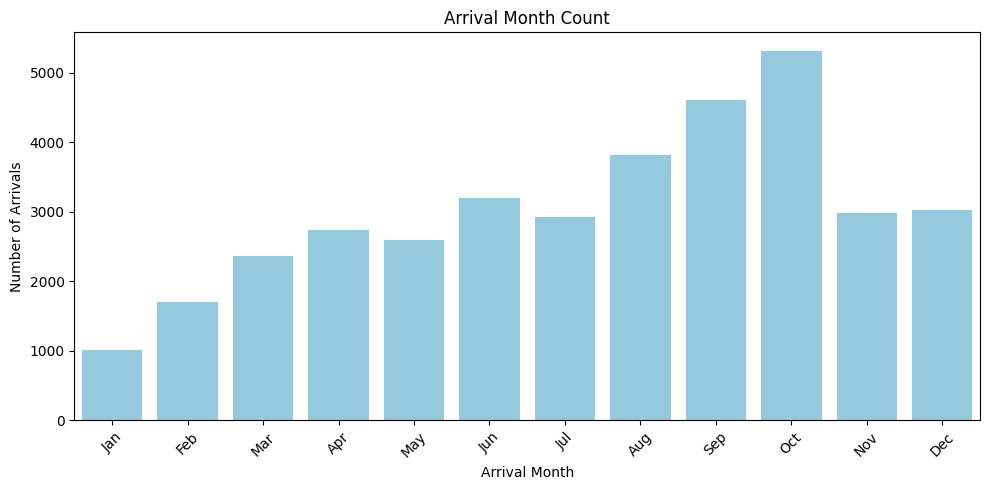

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert month numbers to names
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
inn['arrival_month'] = inn['arrival_month'].map(month_names)

# Ensure ordered categorical type
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
inn['arrival_month'] = pd.Categorical(inn['arrival_month'],
                                      categories=month_order,
                                      ordered=True)

# Plot just the countplot (histogram style)
plt.figure(figsize=(10, 5))
sns.countplot(x='arrival_month', data=inn, order=month_order, color='skyblue')
plt.title("Arrival Month Count")
plt.xlabel("Arrival Month")
plt.ylabel("Number of Arrivals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


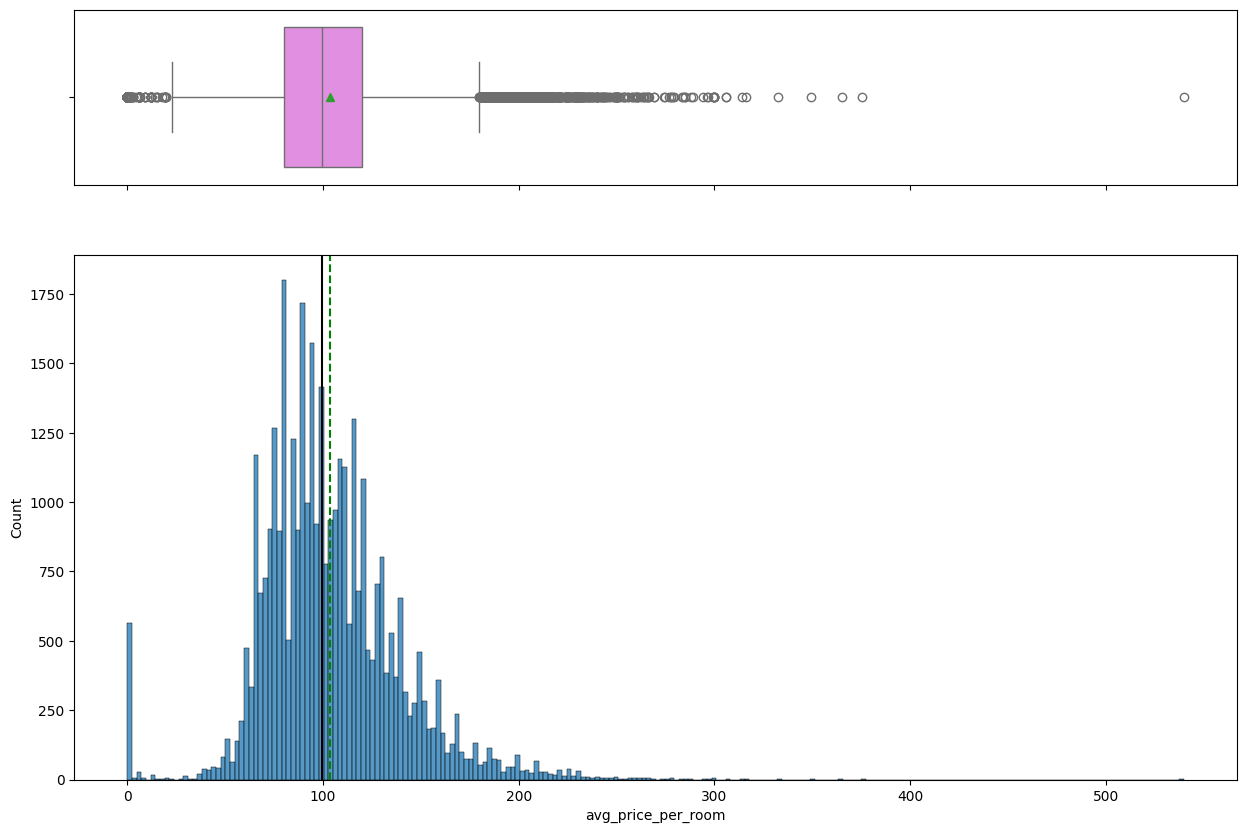

In [ ]:
histogram_boxplot(inn,"avg_price_per_room")

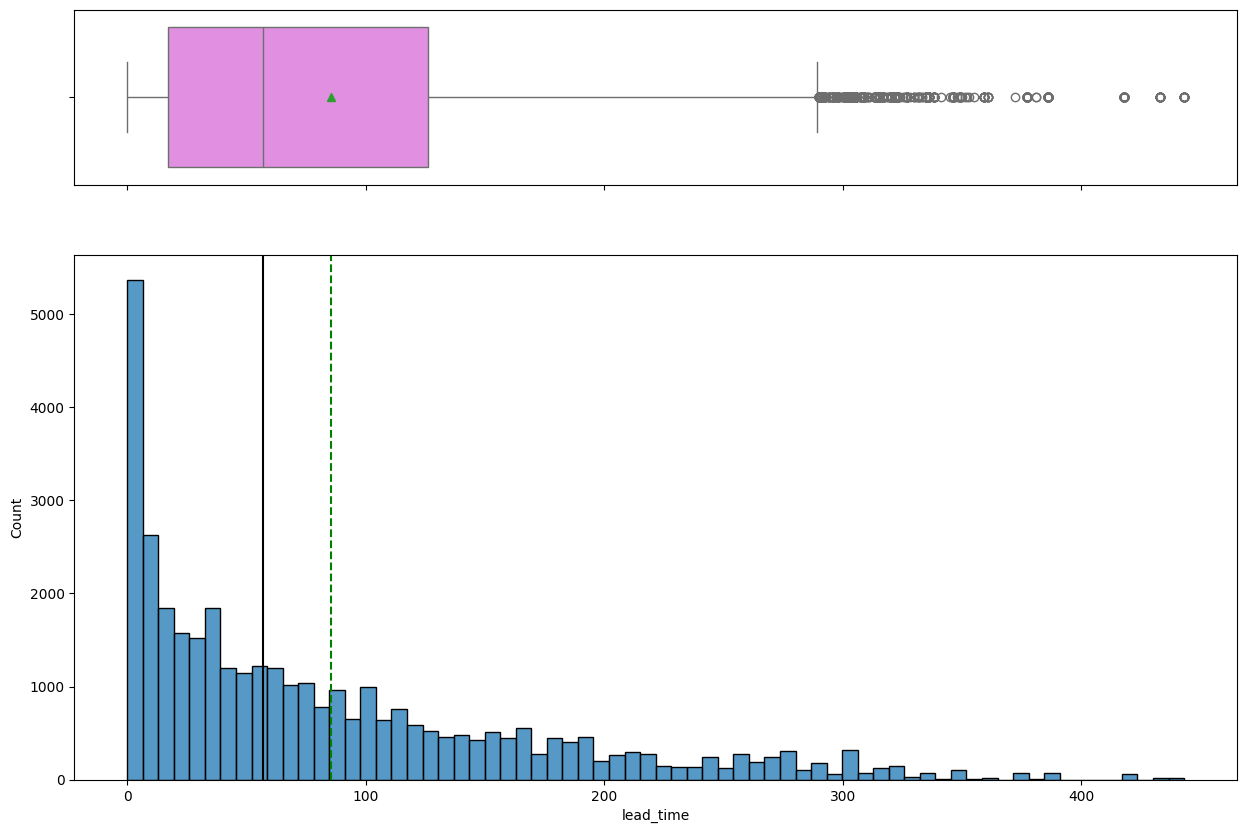

In [ ]:
histogram_boxplot(inn, "lead_time")

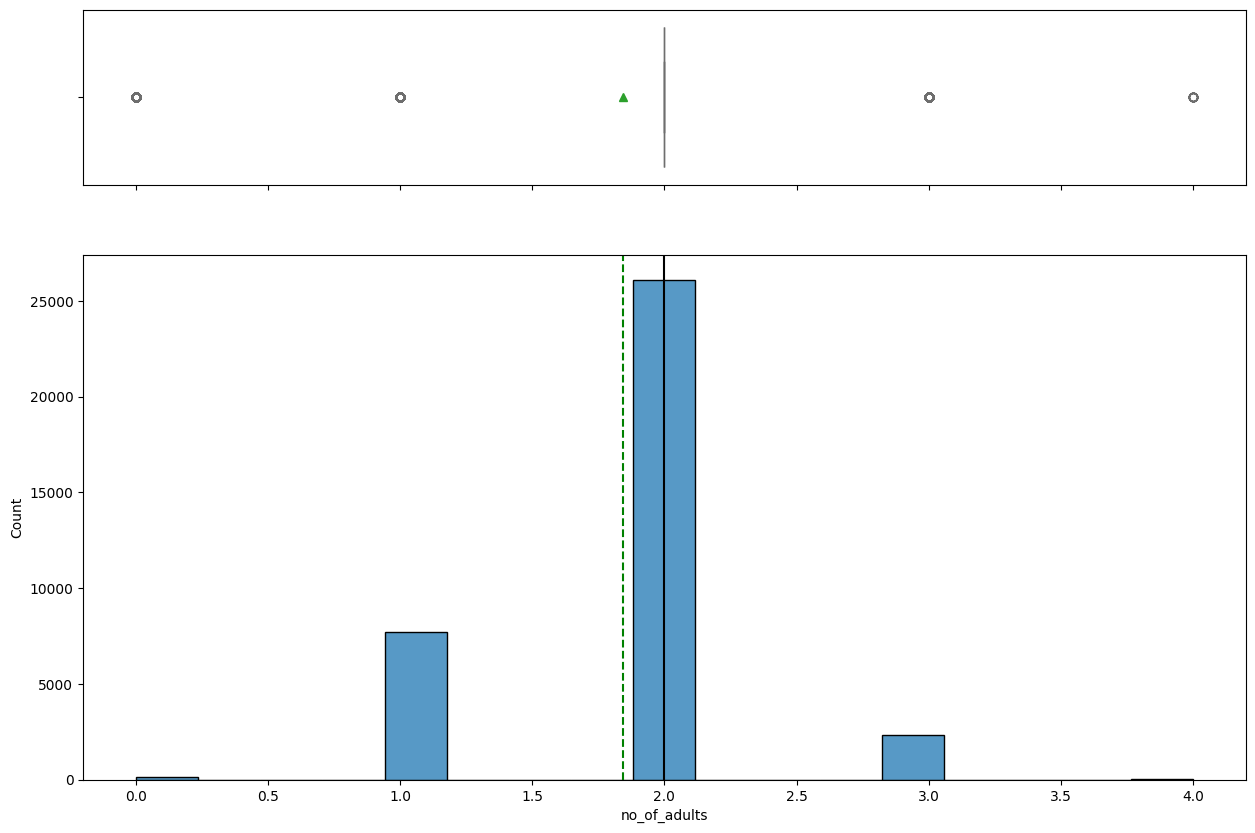

In [ ]:
histogram_boxplot(inn, "no_of_adults")

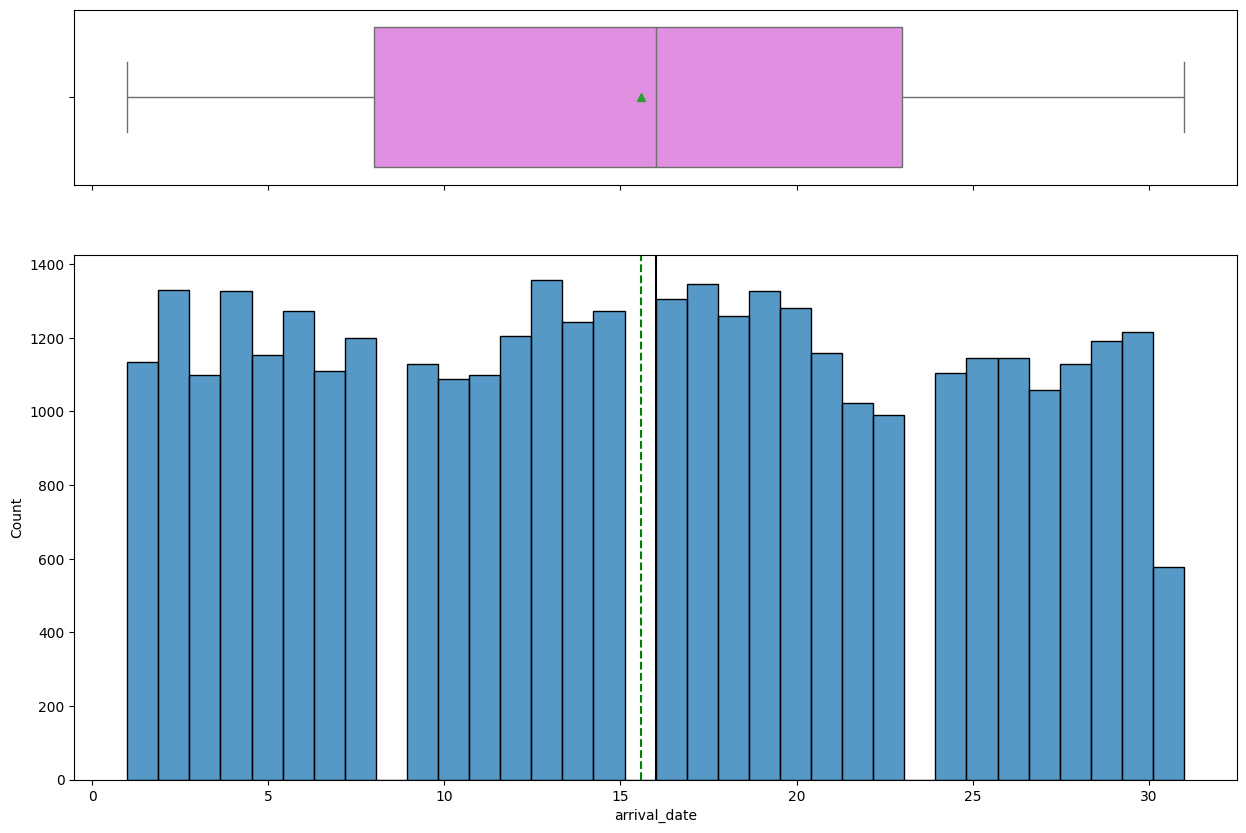

In [ ]:
histogram_boxplot(inn, "arrival_date")

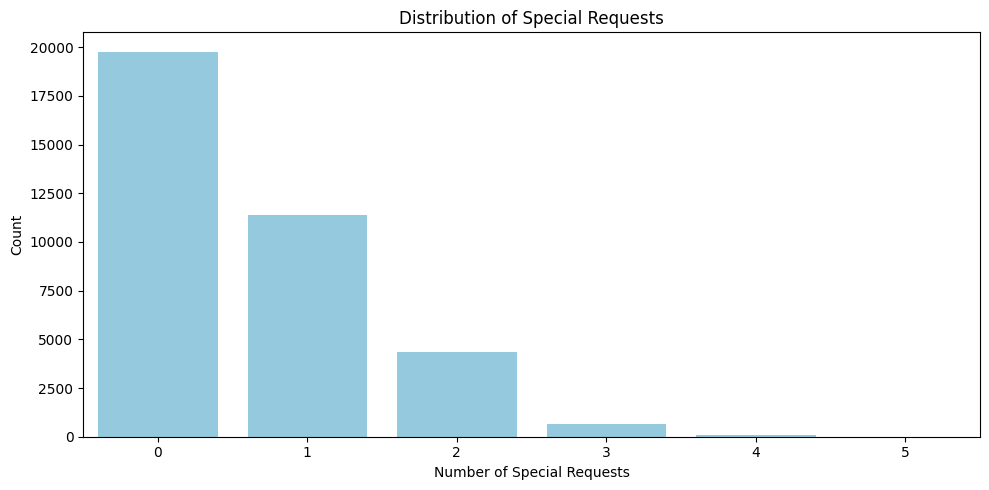

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x='no_of_special_requests', data=inn, color='skyblue')
plt.title('Distribution of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


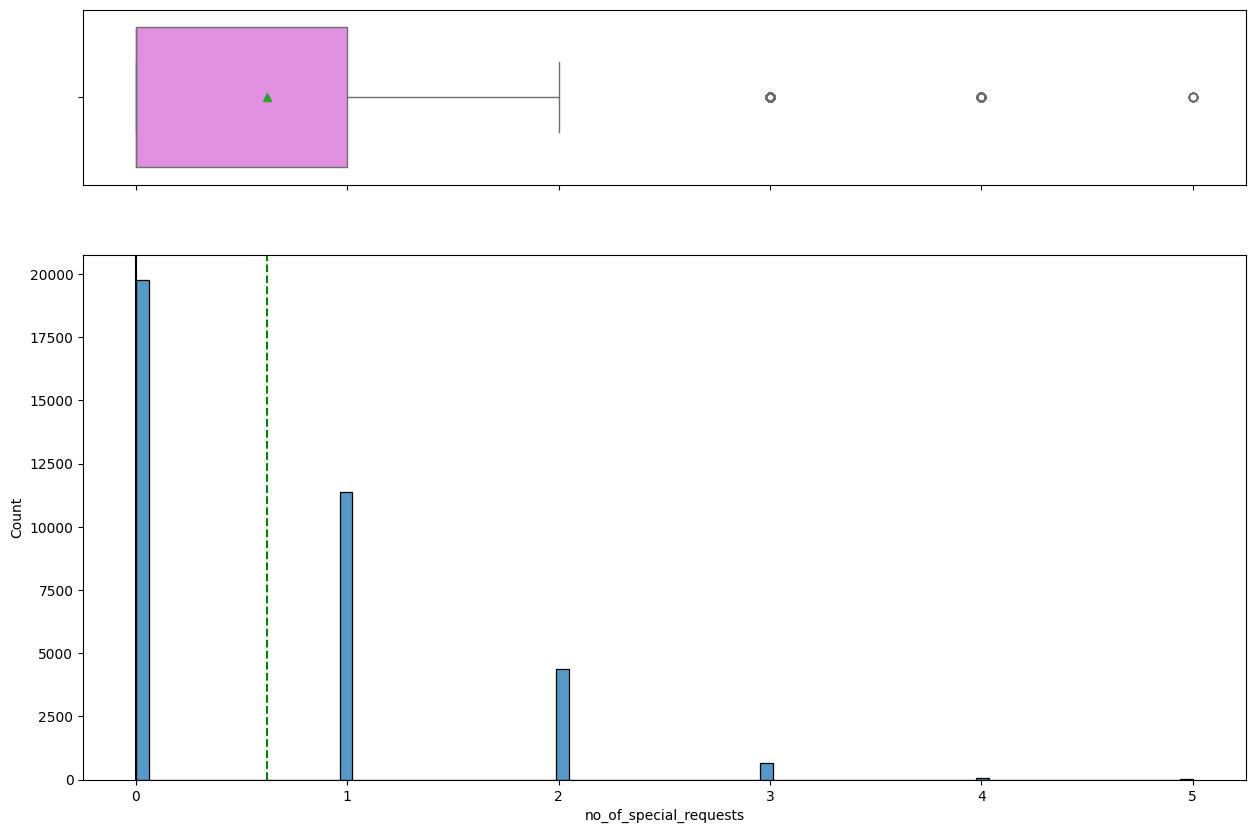

In [ ]:
histogram_boxplot(inn, "no_of_special_requests")

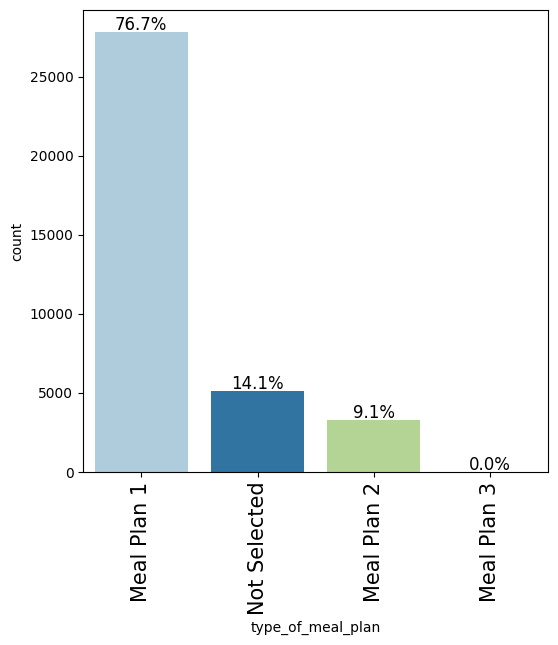

In [ ]:
labeled_barplot(inn, "type_of_meal_plan", perc=True)

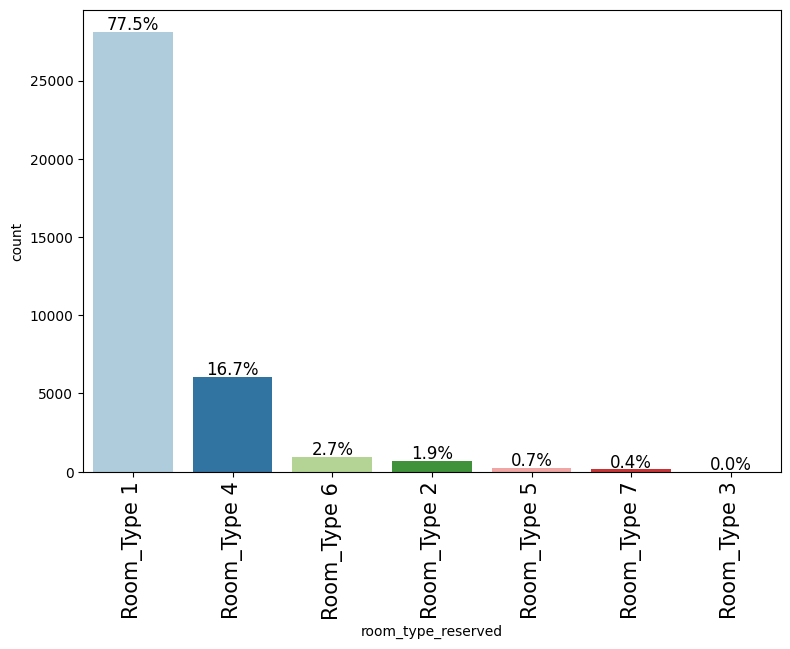

In [ ]:
labeled_barplot(inn, "room_type_reserved", perc=True)

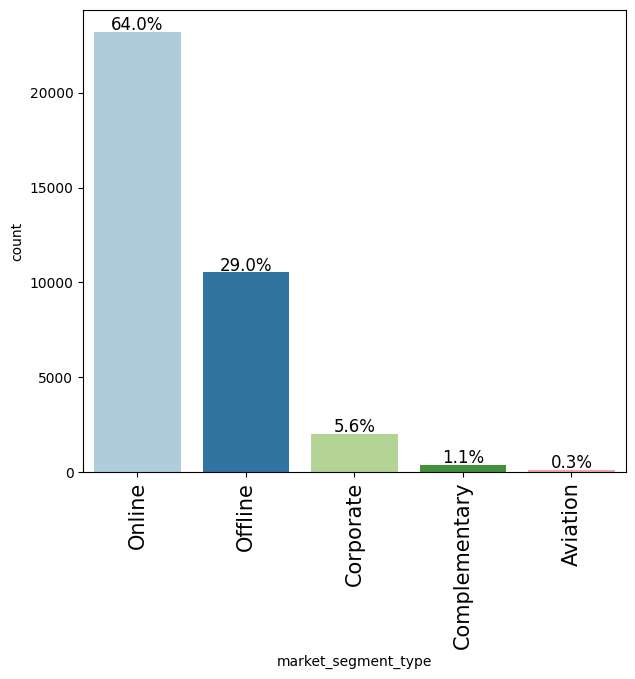

In [ ]:
labeled_barplot(inn, "market_segment_type", perc=True)

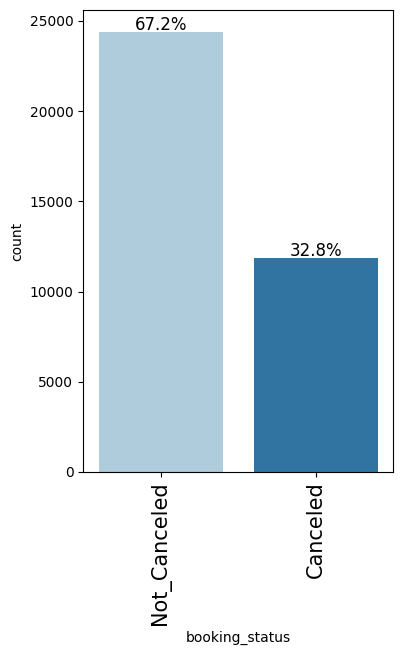

In [ ]:
labeled_barplot(inn, "booking_status", perc=True)

### Bivariate Analysis

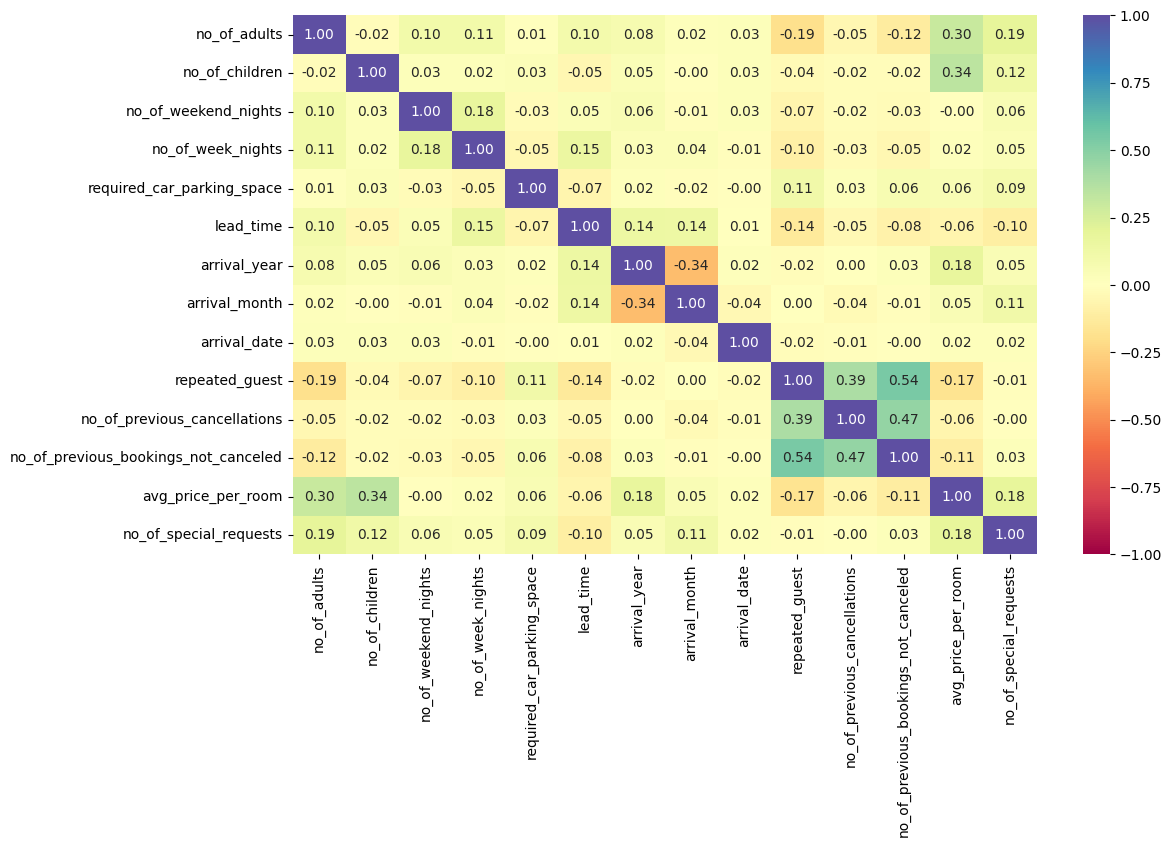

In [ ]:
cols_list = inn.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(12, 7))
sns.heatmap(
    inn[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There's a positive correlation between the `'repeated_guest',` and `no_of_previous_bookings_not_canceled`.
* There's a positive correlation between the `'avg_price_per_room',` and `no_of_children`.
* There's a positive correlation between the `'avg_price_per_room',` and `no_of_adults`.
* There's a negative correlation between the `arrival_year` and `arrival_month`.


**Let's see how the target variable varies across the type of the product**

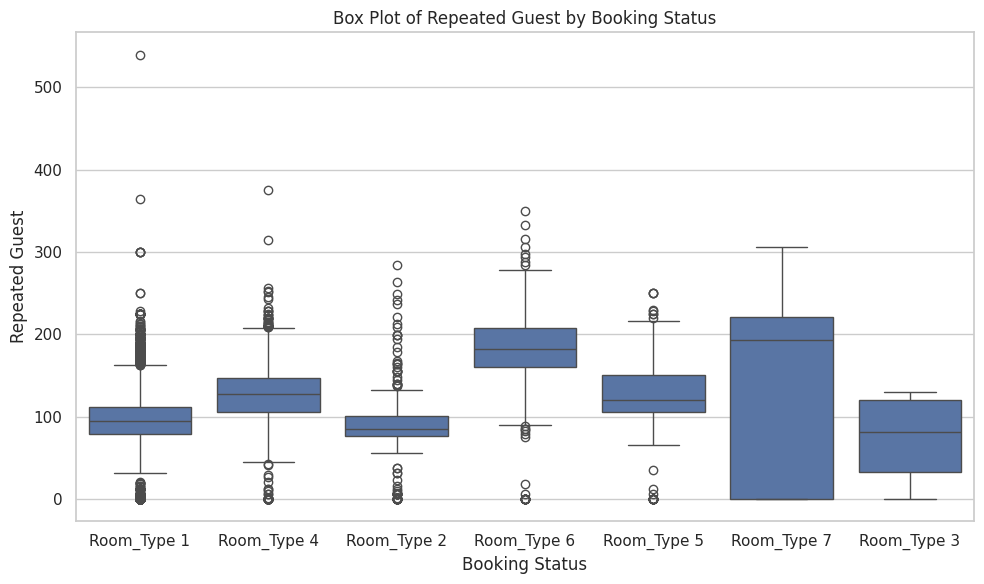

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a box plot of repeated_guest vs booking_status
plt.figure(figsize=(10, 6))
sns.boxplot(x="room_type_reserved", y="avg_price_per_room", data=inn)

# Set plot title and labels
plt.title("Box Plot of Repeated Guest by Booking Status")
plt.xlabel("Booking Status")
plt.ylabel("Repeated Guest")

# Show the plot
plt.tight_layout()
plt.show()


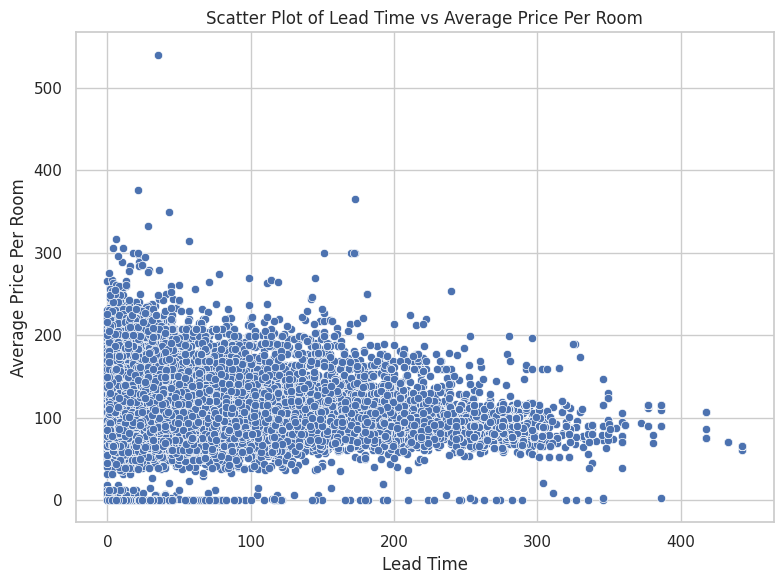

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=inn, x='lead_time', y='avg_price_per_room')

# Set plot title and labels
plt.title("Scatter Plot of Lead Time vs Average Price Per Room")
plt.xlabel("Lead Time")
plt.ylabel("Average Price Per Room")

# Show plot
plt.tight_layout()
plt.show()


Insights:
1. Negative Relationship (Weak):

There's a slight downward trend: as lead time increases, the average price per room tends to decrease.

This suggests that early bookings (high lead time) may come with lower prices, possibly due to early bird discounts.

2. High Density at Low Lead Time:

A large number of bookings occur with low lead time (0–100 days), indicating many customers book rooms closer to their stay dates.

Within this range, room prices vary widely—from very low to over 500 units.

3. Price Compression at High Lead Times:

For lead times above ~300 days, the price per room is generally below 150 units, with fewer high-priced outliers.

This may indicate that far-in-advance bookings are more budget-conscious or offered at standardized lower rates.

4. Outliers:

There are outlier prices above 300 units, mostly concentrated at short lead times.

These could be due to last-minute premium bookings, luxury room types, or special events.

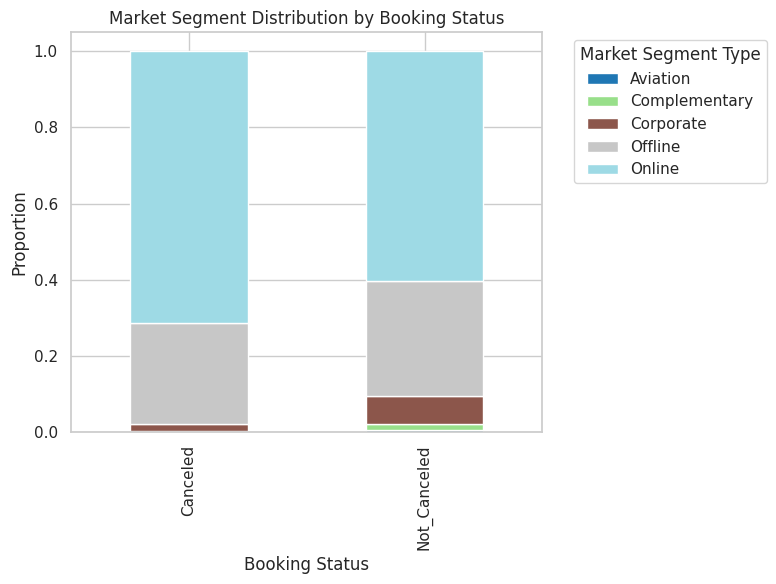

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a normalized crosstab (proportions within each booking_status)
crosstab = pd.crosstab(inn['booking_status'], inn['market_segment_type'], normalize='index')

# Plot as a stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20')

# Customize the plot
plt.title('Market Segment Distribution by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Proportion')
plt.legend(title='Market Segment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


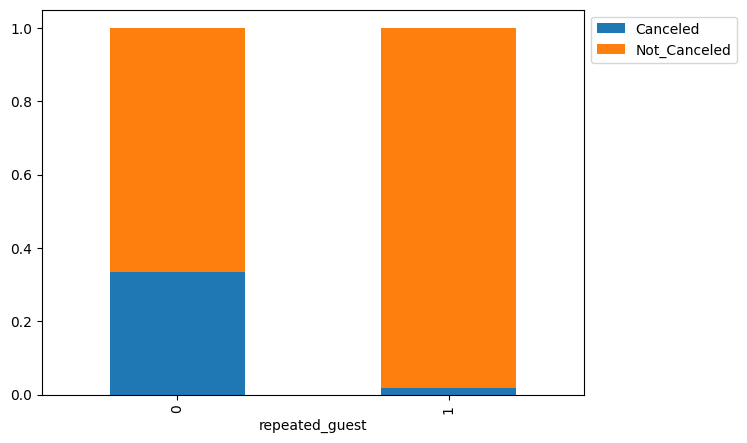

In [ ]:
stacked_barplot(inn, "repeated_guest", "booking_status")

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


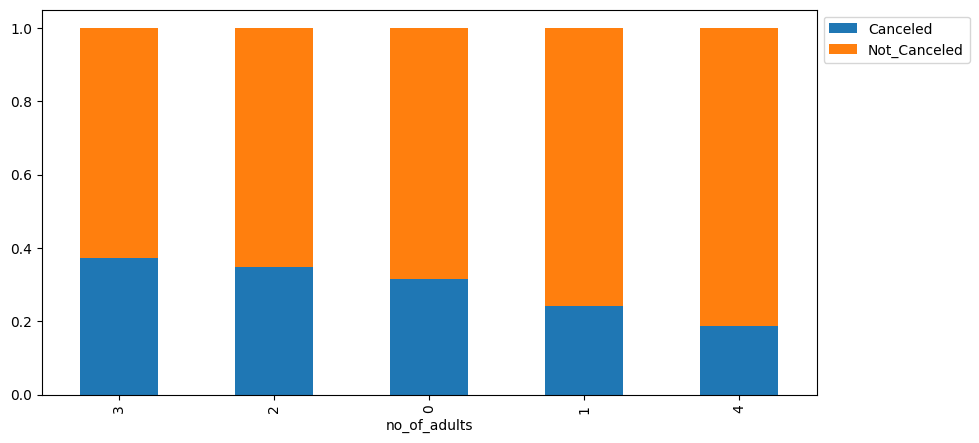

In [ ]:
stacked_barplot(inn, "no_of_adults", "booking_status")

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      5            14     19
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


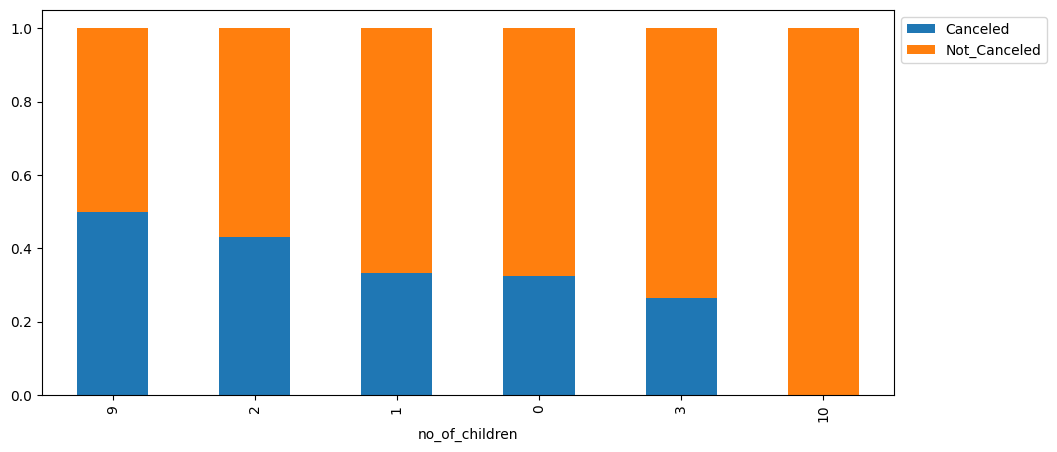

In [ ]:
stacked_barplot(inn, "no_of_children", "booking_status")

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


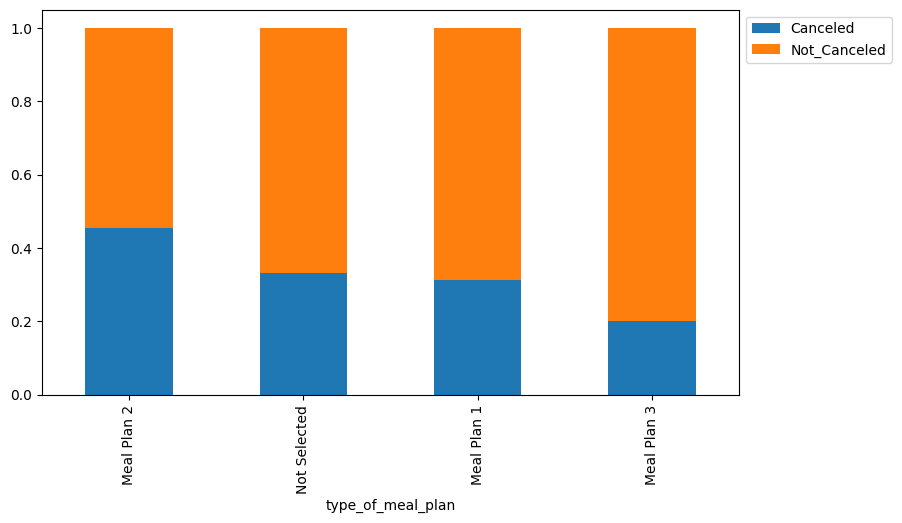

In [ ]:
stacked_barplot(inn, "type_of_meal_plan", "booking_status")

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


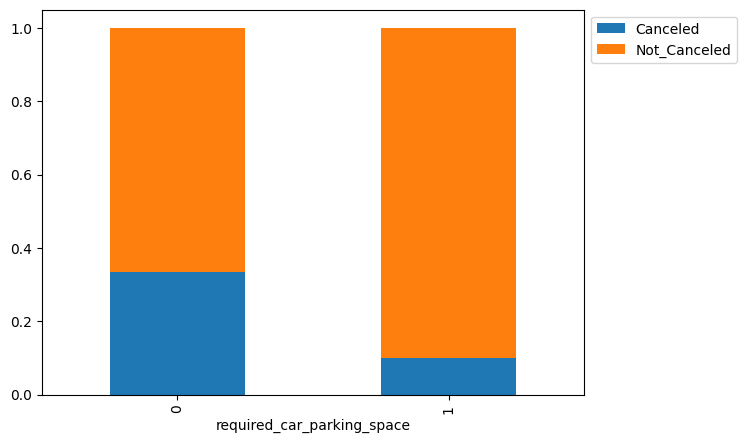

In [ ]:
stacked_barplot(inn, "required_car_parking_space", "booking_status")

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


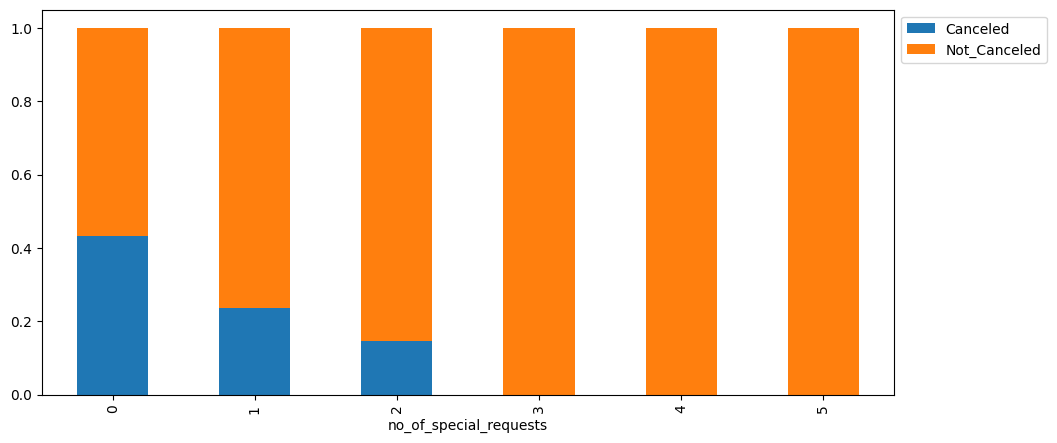

In [ ]:
stacked_barplot(inn, "no_of_special_requests", "booking_status")

booking_status                Canceled  Not_Canceled    All
no_of_previous_cancellations                               
All                              11885         24390  36275
0                                11869         24068  35937
1                                   11           187    198
13                                   4             0      4
3                                    1            42     43
2                                    0            46     46
5                                    0            11     11
4                                    0            10     10
11                                   0            25     25
6                                    0             1      1
------------------------------------------------------------------------------------------------------------------------


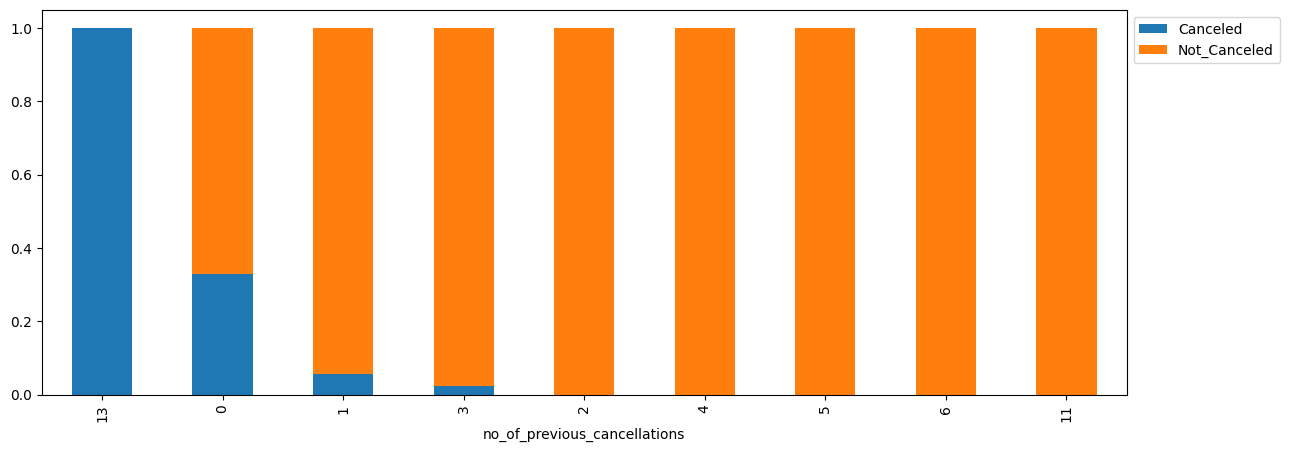

In [ ]:
stacked_barplot(inn, "no_of_previous_cancellations", "booking_status")

repeated_guest      0    1    All
arrival_month                    
All             35345  930  36275
Oct              5174  143   5317
Dec              2888  133   3021
Nov              2870  110   2980
Sep              4503  108   4611
Mar              2283   75   2358
Jan               940   74   1014
May              2535   63   2598
Feb              1645   59   1704
Jun              3148   55   3203
Apr              2686   50   2736
Jul              2880   40   2920
Aug              3793   20   3813
------------------------------------------------------------------------------------------------------------------------


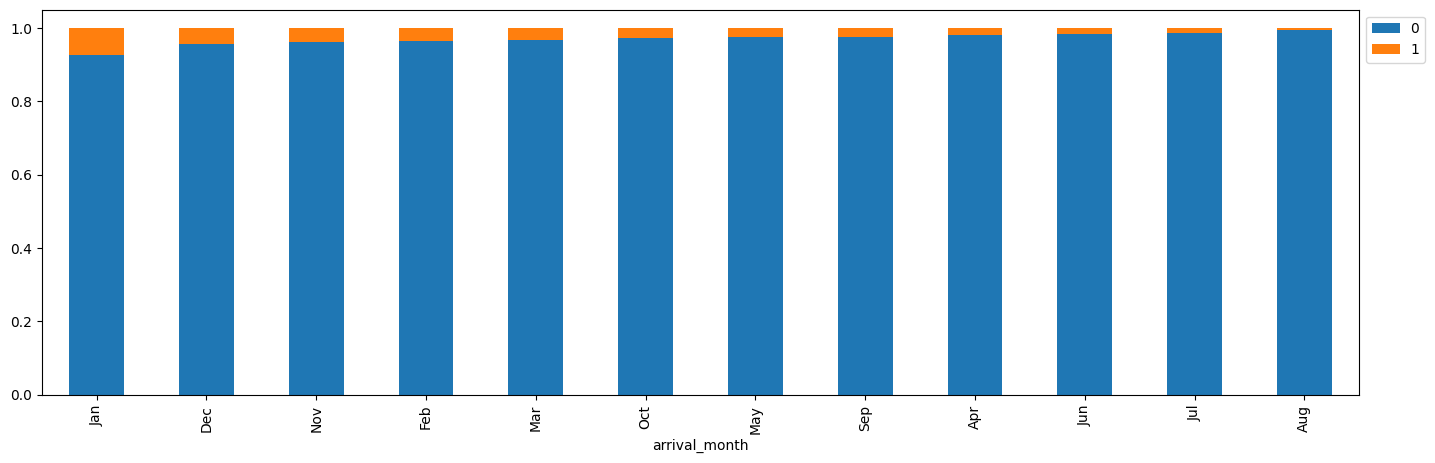

In [ ]:
stacked_barplot(inn, "arrival_month", "repeated_guest")

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


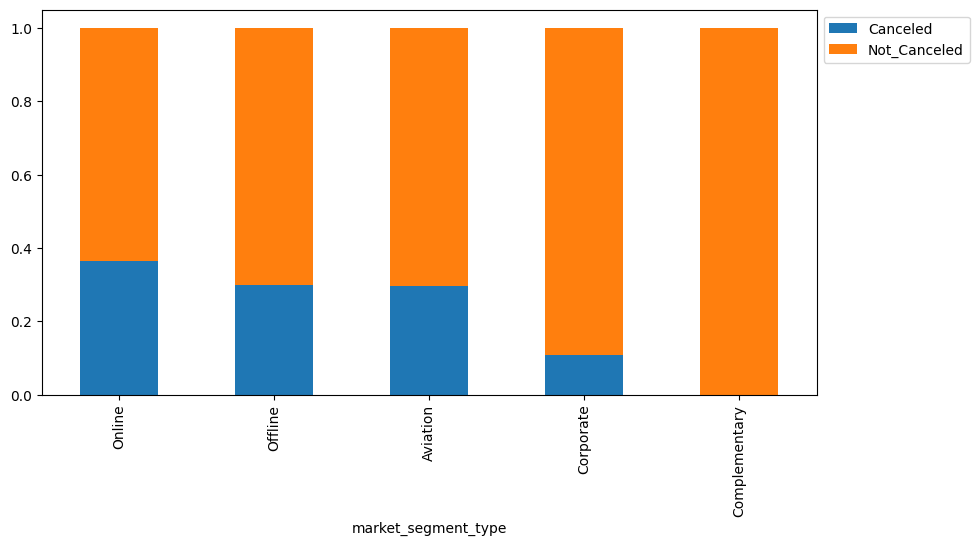

In [ ]:
stacked_barplot(inn, "market_segment_type", "booking_status")

room_type_reserved   Room_Type 1  Room_Type 2  Room_Type 3  Room_Type 4  \
market_segment_type                                                       
All                        28130          692            7         6057   
Complementary                247           20            2           52   
Online                     16243          613            2         5228   
Offline                     9747           57            2          613   
Corporate                   1833            2            1           99   
Aviation                      60            0            0           65   

room_type_reserved   Room_Type 5  Room_Type 6  Room_Type 7    All  
market_segment_type                                                
All                          265          966          158  36275  
Complementary                 17           14           39    391  
Online                        93          926          109  23214  
Offline                       81           23            5 

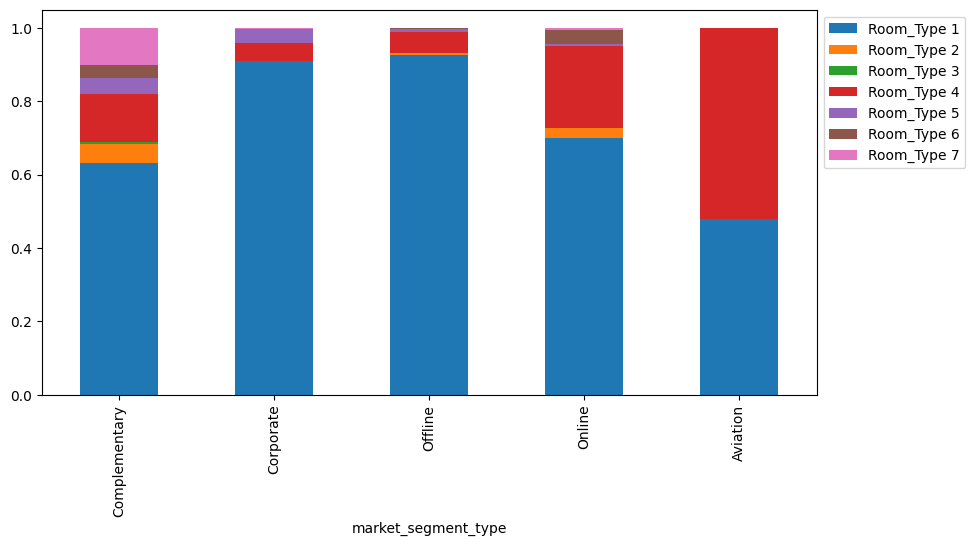

In [ ]:
stacked_barplot(inn, "market_segment_type", "room_type_reserved")

**Let's analyze the relation between `lead_time` and `booking_status`.**

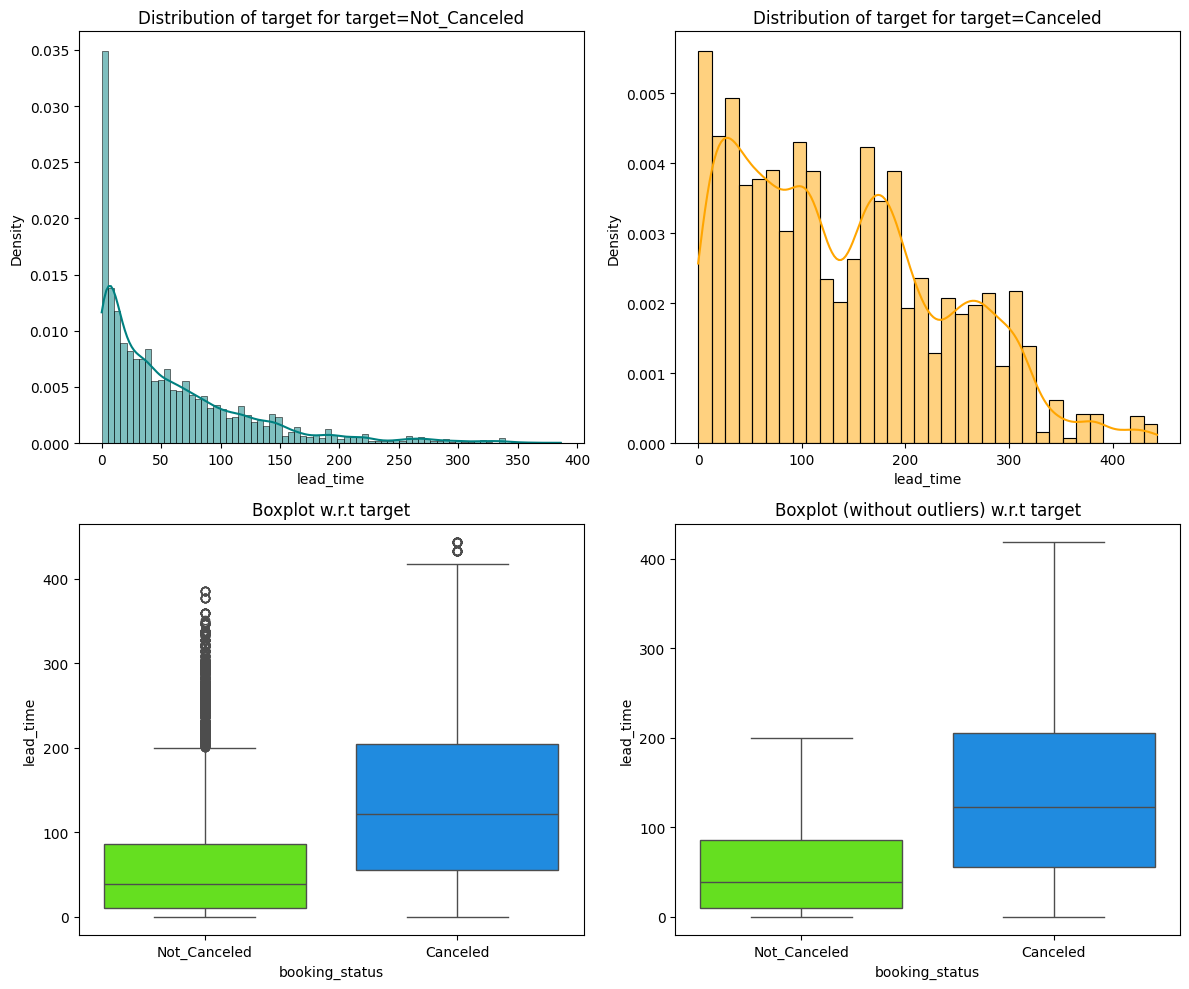

In [ ]:
distribution_plot_wrt_target(inn, "lead_time", "booking_status")

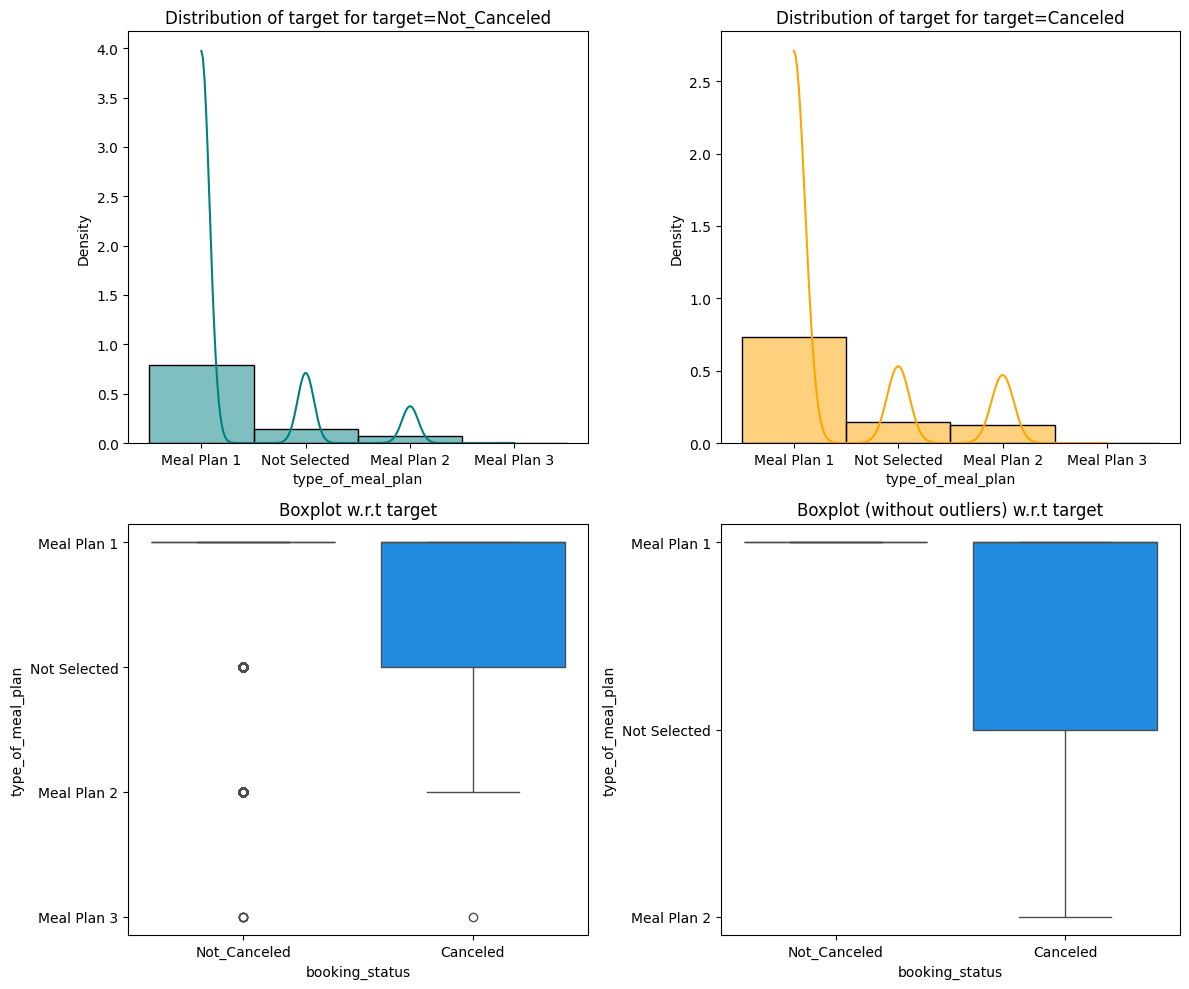

In [ ]:
distribution_plot_wrt_target(inn, "type_of_meal_plan", "booking_status")

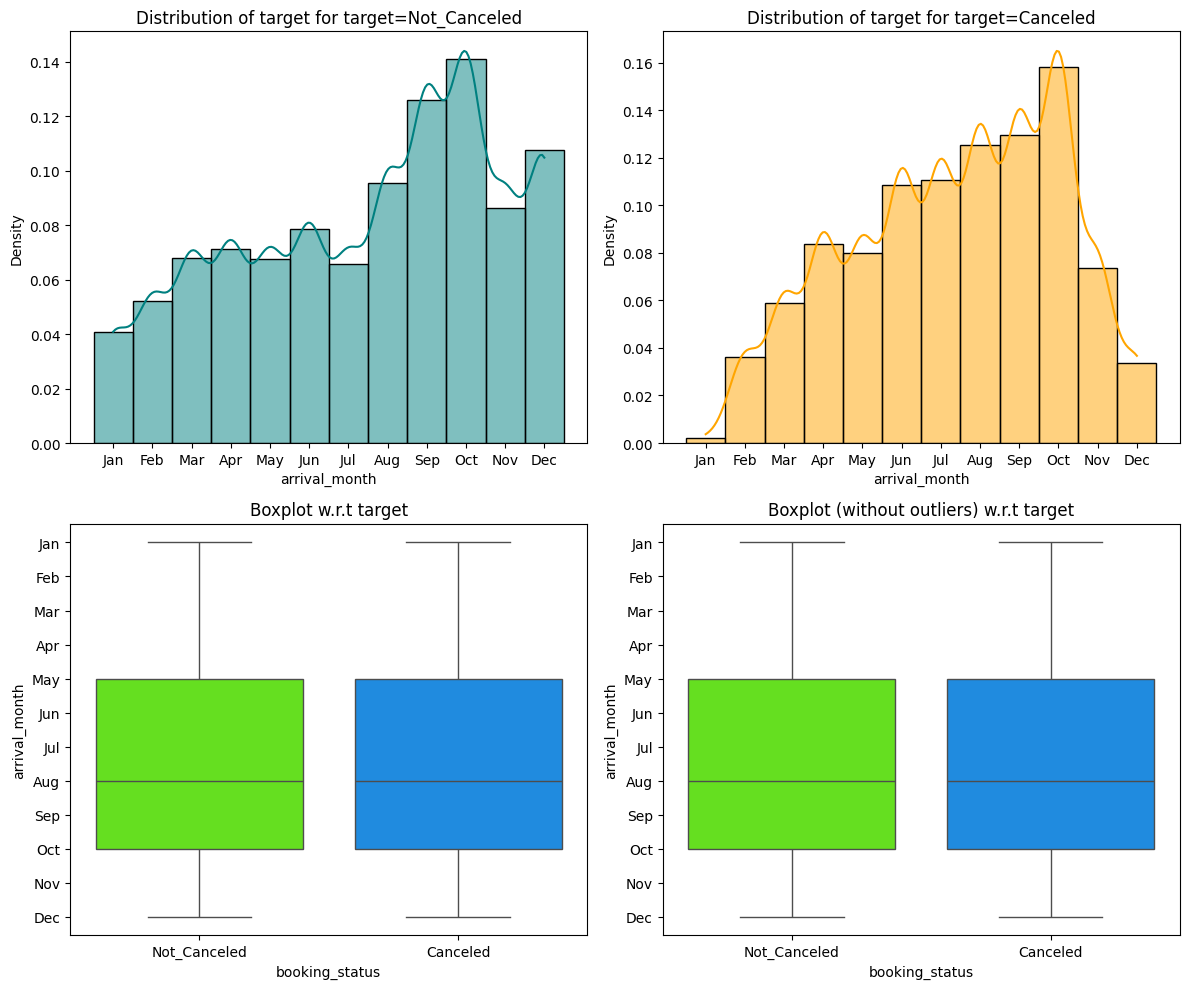

In [ ]:
distribution_plot_wrt_target(inn, "arrival_month", "booking_status")

### Problem statement

Monthly Bookings:
        no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

      type_of_meal_p

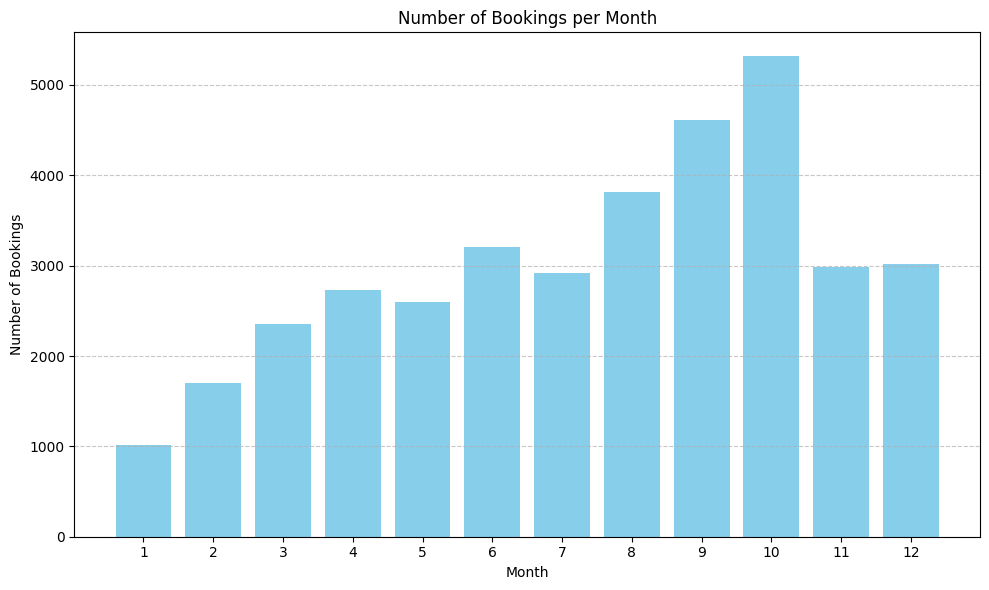

In [ ]:
# 1.What are the busiest months in the hotel?

# Count the number of bookings per month
monthly_bookings= inn['arrival_month'].value_counts().sort_index()

# Display the monthly bookings
print("Monthly Bookings:\n", inn)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_bookings.index, monthly_bookings.values, color='skyblue')
plt.title('Number of Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**The busiest months for the hotel are:**

* October (5,317 bookings)

* September (4,611 bookings)

* August (3,813 bookings)

Market Segment Counts:
 market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64


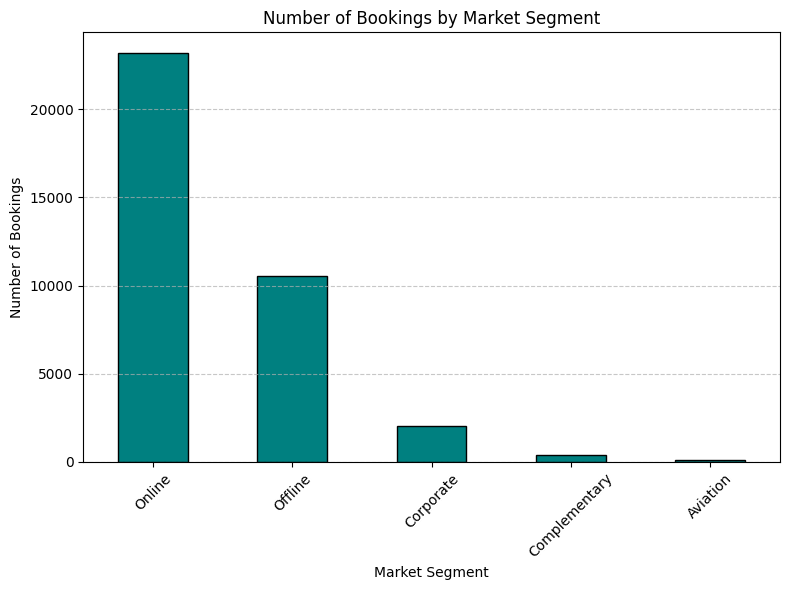

In [ ]:
# 2. Which market segment do most of the guests come from?

# Count the number of bookings by market segment
market_segment_counts = inn['market_segment_type'].value_counts()

# Display the counts
print("Market Segment Counts:\n", market_segment_counts)

# Plotting the market segment distribution
plt.figure(figsize=(8, 6))
market_segment_counts.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Number of Bookings by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


* Most of the guests come from the Online market segment, with 23,214 bookings.

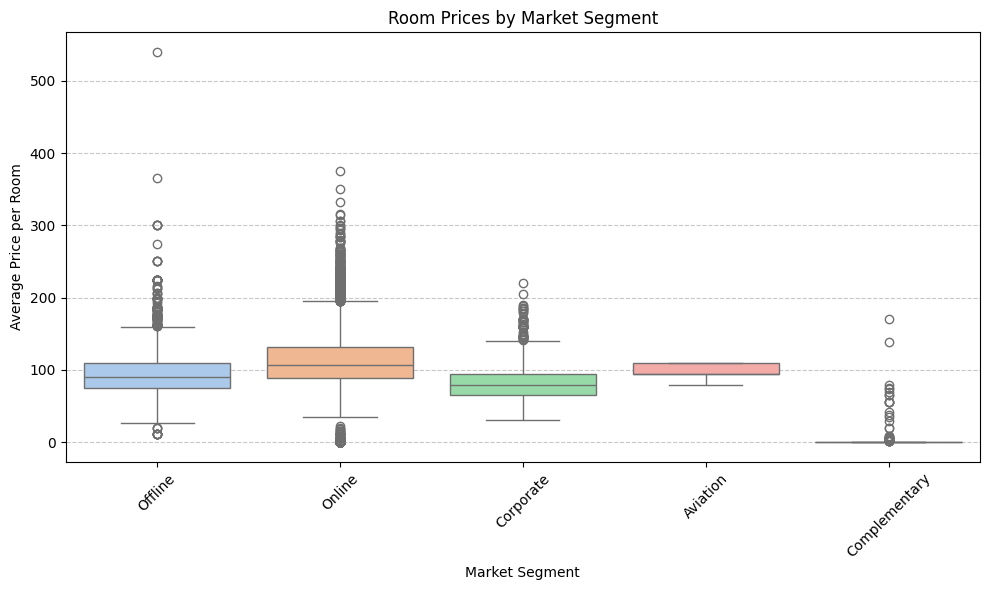

Room Price Summary by Market Segment:
                           count      mean      std      min      25%  \
market_segment_type                                                    
Aviation              125.00000 100.70400  8.53836 79.00000 95.00000   
Complementary         391.00000   3.14176 15.51297  0.00000  0.00000   
Corporate            2017.00000  82.91174 23.69000 31.00000 65.00000   
Offline             10528.00000  91.63268 24.99560 12.00000 75.00000   
Online              23214.00000 112.25685 35.22032  0.00000 89.00000   

                          50%       75%       max  
market_segment_type                                
Aviation             95.00000 110.00000 110.00000  
Complementary         0.00000   0.00000 170.00000  
Corporate            79.00000  95.00000 220.00000  
Offline              90.00000 109.00000 540.00000  
Online              107.10000 131.75000 375.50000  


In [ ]:
# 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

# Boxplot of room prices by market segment
plt.figure(figsize=(10, 6))
sns.boxplot(x='market_segment_type', y='avg_price_per_room', data=inn, palette='pastel')
plt.title('Room Prices by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Price per Room')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Group by market segment and calculate summary statistics
price_summary = inn.groupby('market_segment_type')['avg_price_per_room'].describe()

# Display the summary
print("Room Price Summary by Market Segment:\n", price_summary)


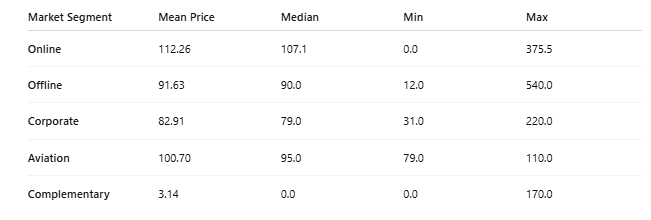

**Insights:**
* Online bookings have the highest average price per room, suggesting demand or higher willingness to pay.

* Offline and Corporate rates are moderately priced.

* Aviation guests tend to have consistently high rates with a narrow price range.

* Complementary segment has near-zero pricing (e.g., free stays for promotions, partners, or staff).

Percentage of bookings canceled: 32.76%


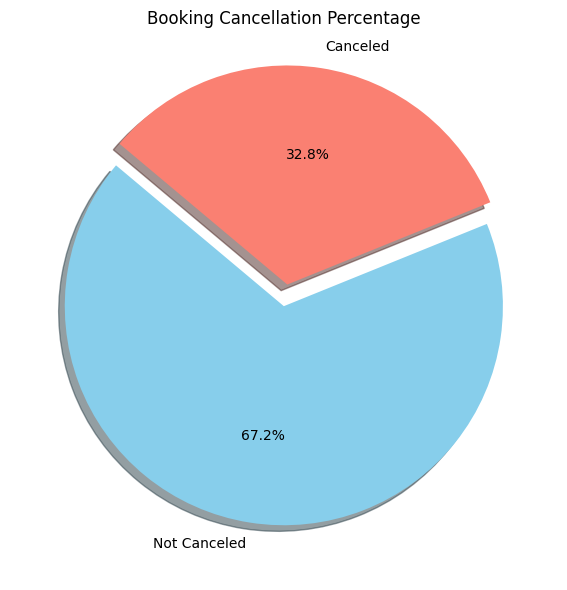

In [ ]:
# 4. What percentage of bookings are canceled?

# Calculate counts
total_bookings = len(inn)
canceled_bookings = (inn['booking_status'] == 'Canceled').sum()
not_canceled_bookings = total_bookings - canceled_bookings

# Calculate percentage
cancellation_percentage = (canceled_bookings / total_bookings) * 100
print(f"Percentage of bookings canceled: {cancellation_percentage:.2f}%")

# Plotting the cancellation status
labels = ['Not Canceled', 'Canceled']
sizes = [not_canceled_bookings, canceled_bookings]
colors = ['skyblue', 'salmon']
explode = (0, 0.1)  # explode the 'Canceled' slice

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=140, explode=explode, shadow=True)
plt.title('Booking Cancellation Percentage')
plt.tight_layout()
plt.show()


* **Approximately 32.76% of all bookings in the dataset are canceled.**

Percentage of repeating guests who cancel: 1.72%


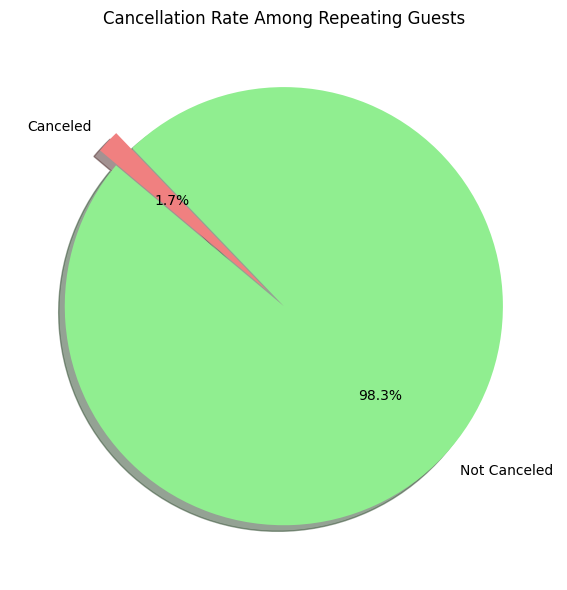

In [ ]:
# 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

# Filter only repeating guests
repeating_guests = inn[inn['repeated_guest'] == 1]

# Calculate total and canceled bookings for repeating guests
total_repeating = len(repeating_guests)
canceled_repeating = (repeating_guests['booking_status'] == 'Canceled').sum()
not_canceled_repeating = total_repeating - canceled_repeating

# Calculate cancellation percentage
cancel_percent_repeating = (canceled_repeating / total_repeating) * 100
print(f"Percentage of repeating guests who cancel: {cancel_percent_repeating:.2f}%")

# Plotting the cancellation status for repeating guests
labels = ['Not Canceled', 'Canceled']
sizes = [not_canceled_repeating, canceled_repeating]
colors = ['lightgreen', 'lightcoral']
explode = (0, 0.1)  # explode the 'Canceled' slice

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=140, explode=explode, shadow=True)
plt.title('Cancellation Rate Among Repeating Guests')
plt.tight_layout()
plt.show()


* Only about 1.72% of repeating guests cancel their bookings.

* This is significantly lower than the overall cancellation rate (~32.76%), highlighting that repeat guests are more reliable and possibly more loyal.

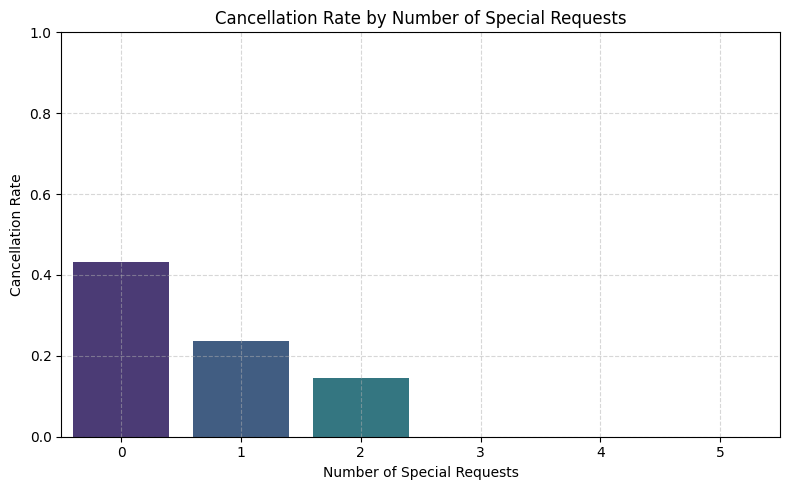

In [ ]:
# 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

# Convert booking_status to binary: 1 for 'Canceled', 0 for 'Not_Canceled'
inn['is_canceled'] = inn['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

# Group by number of special requests and calculate cancellation rate
special_requests_cancellation = inn.groupby('no_of_special_requests')['is_canceled'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='no_of_special_requests', y='is_canceled', data=special_requests_cancellation, palette='viridis')
plt.title('Cancellation Rate by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Cancellation Rate')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**The bar chart shows the cancellation rate decreases as the number of special requests increases. This suggests:**

* Guests with no special requests are more likely to cancel.

* Guests with more special requests tend to follow through with their bookings, likely due to stronger commitment or specific needs.

In conclusion, special requirements are negatively associated with cancellations—they reduce the likelihood of a booking being canceled.

## Data Preprocessing

### Check for missing values

In [ ]:
missing = inn.isnull().sum()
print("Missing values:\n", missing[missing > 0])

Missing values:
 Series([], dtype: int64)


**There are no missing values in the dataset.**

### Outlier Detection

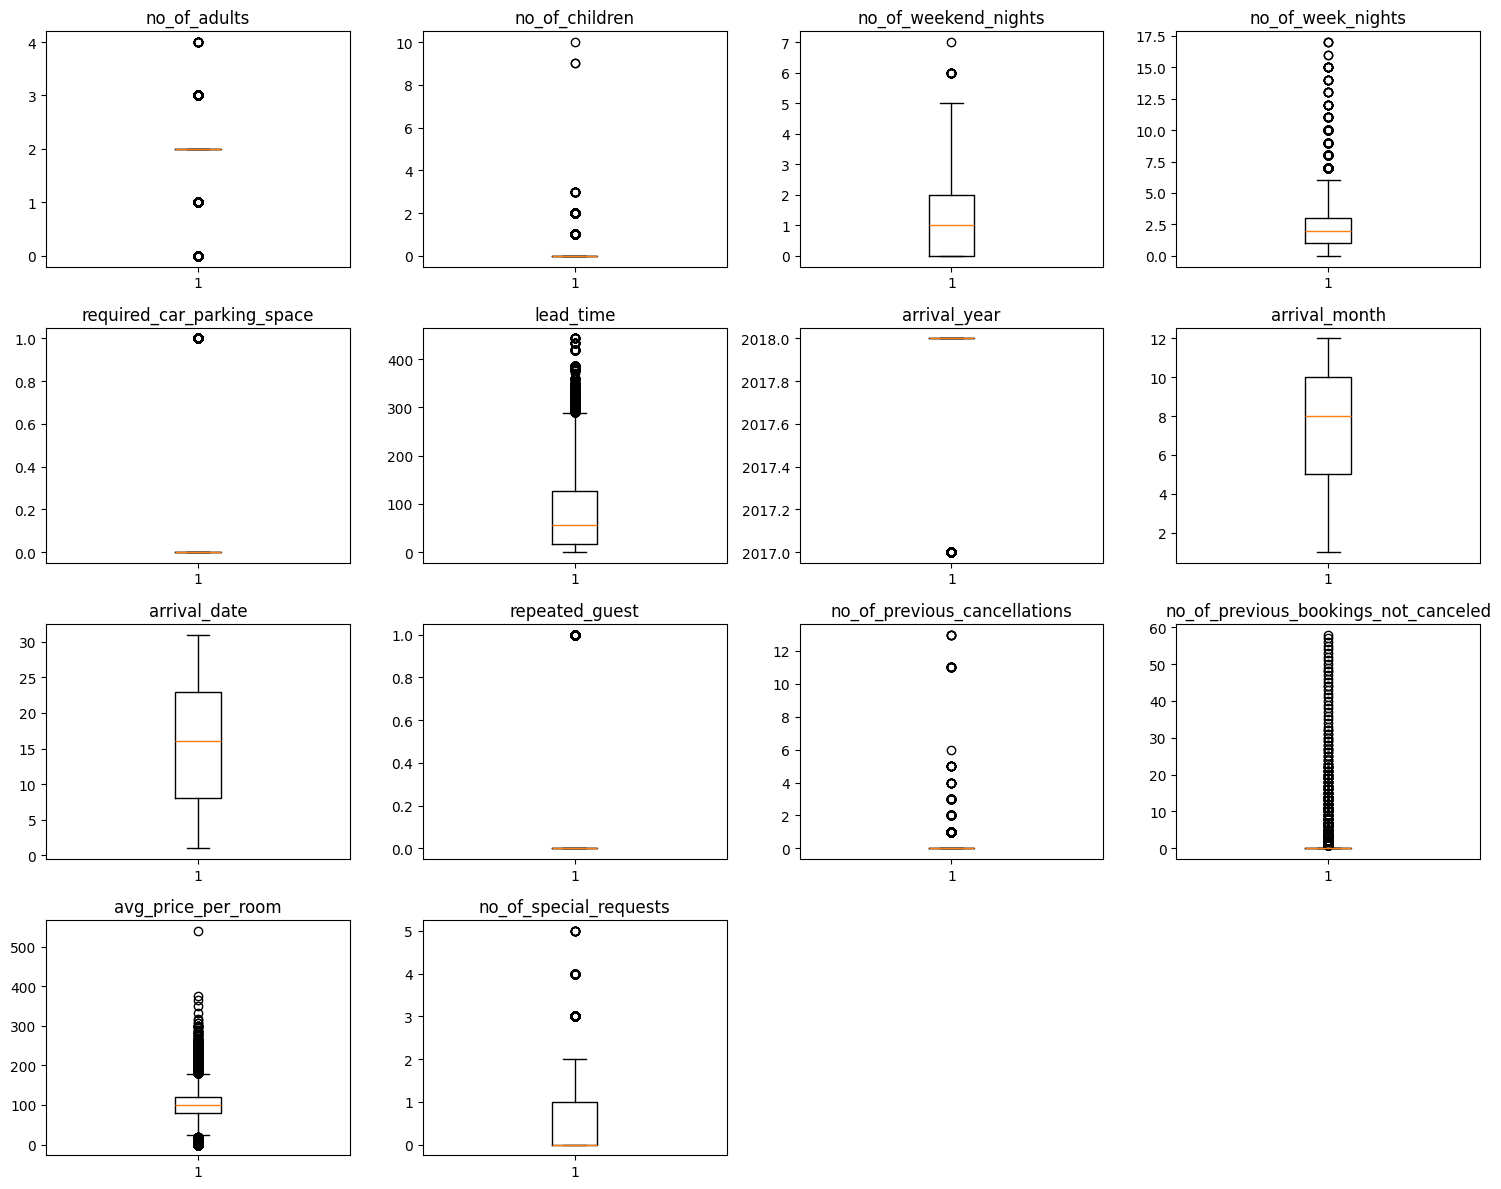

In [ ]:
# outlier detection using boxplot
numeric_columns = inn.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(inn[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

### FEATURE ENGINEERING

In [6]:
#Total nights stayed
inn['total_nights'] = inn['no_of_weekend_nights'] + inn['no_of_week_nights']
print(inn['total_nights'])



0        3
1        5
2        3
3        2
4        2
        ..
36270    8
36271    4
36272    8
36273    3
36274    3
Name: total_nights, Length: 36275, dtype: int64


### Data Preparation for Modeling

In [ ]:
inn.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
inn['booking_status'] = inn['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

In [8]:
X = inn.drop(["booking_status"], axis=1)  # Dropping ID and target column
Y = inn["booking_status"]

print(X.head())
print(Y.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segm

In [9]:
X = inn.drop([ "booking_status"], axis=1)  # Dropping ID and target column
Y = inn["booking_status"]

X = pd.get_dummies(X, drop_first=True)

#Converting values to float
X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42
)

In [10]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
booking_status
0   0.67399
1   0.32601
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.66857
1   0.33143
Name: proportion, dtype: float64


* We had seen that around 67% of observations belongs to class 0 (Not Cancelled) and 32.9% observations belongs to class 1 (cancelled), and this is preserved in the train and test sets

## Model Building

### Decision Tree (default)

In [11]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import statsmodels.api as sm

# Assuming X_train, X_test, y_train, y_test are already defined

### 1. Choose Evaluation Metrics
# Since it's a binary classification with imbalanced classes (~67:33), use:
# Accuracy, Precision, Recall, F1-Score, ROC-AUC

### 2. Logistic Regression (statsmodels)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Predict probabilities and labels
y_pred_prob_log = result.predict(X_test_sm)
y_pred_log = (y_pred_prob_log >= 0.5).astype(int)

### 3. Decision Tree Classifier (sklearn)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]

### 4. Evaluation Function
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log, y_pred_prob_log, "Logistic Regression (statsmodels)")

# Evaluate Decision Tree
evaluate_model(y_test, y_pred_dt, y_pred_prob_dt, "Decision Tree (sklearn)")


         Current function value: 0.424659
         Iterations: 35

--- Logistic Regression (statsmodels) ---
Accuracy: 0.807222273270238
Precision: 0.7519198664440735
Recall: 0.6243415580815082
F1 Score: 0.6822175098455013


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ROC AUC: 0.8651772872154856
Confusion Matrix:
 [[6533  743]
 [1355 2252]]

--- Decision Tree (sklearn) ---
Accuracy: 0.8629054488652026
Precision: 0.7880686461454645
Recall: 0.8020515663986693
F1 Score: 0.7949986259961528
ROC AUC: 0.8499742727361266
Confusion Matrix:
 [[6498  778]
 [ 714 2893]]


In [24]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model Evaluation

In [25]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [26]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression (with statsmodels library)

In [15]:
import statsmodels.api as sm

X = inn.drop("booking_status", axis=1)
Y = inn["booking_status"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

#Converting values to float
X = X.astype(float)

# adding constant
X = sm.add_constant(X)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [16]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25363
Method:                           MLE   Df Model:                           28
Date:                Sun, 01 Jun 2025   Pseudo R-squ.:                  0.3293
Time:                        12:46:15   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.5923    120.817     -7.653      0.000   -1161.390    -687.795
no_of_adults                             0.1135      

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Additional Information on VIF

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearity that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39468156.70600
no_of_adults                                  1.34815
no_of_children                                1.97823
no_of_weekend_nights                              inf
no_of_week_nights                                 inf
required_car_parking_space                    1.03993
lead_time                                     1.39491
arrival_year                                  1.43083
arrival_month                                 1.27567
arrival_date                                  1.00674
repeated_guest                                1.78352
no_of_previous_cancellations                  1.39569
no_of_previous_bookings_not_canceled          1.65199
avg_price_per_room                            2.05042
no_of_special_requests                        1.24728
total_nights                                      inf
type_of_meal_plan_Meal Plan 2                 1.27185
type_of_meal_plan_Meal Plan 3                 1

In [18]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    """Calculate VIF for each variable in the dataframe X"""
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

def drop_high_vif_features(X, threshold=10.0):
    """Iteratively drop features with VIF above the threshold"""
    X = X.copy()
    X = sm.add_constant(X)  # add intercept
    dropped = []

    while True:
        vif_df = calculate_vif(X)
        max_vif = vif_df.loc[vif_df['feature'] != 'const', 'VIF'].max()
        if max_vif <= threshold:
            break
        else:
            # Drop the variable with highest VIF (excluding constant)
            feature_to_drop = vif_df.loc[vif_df['feature'] != 'const'].sort_values("VIF", ascending=False).iloc[0]["feature"]
            print(f"Dropping '{feature_to_drop}' with VIF: {max_vif}")
            X = X.drop(columns=[feature_to_drop])
            dropped.append(feature_to_drop)

    X = X.drop(columns=["const"])  # remove constant before returning
    return X, dropped

# Example usage
# df = your full dataframe (excluding target variable)
# X_cleaned, dropped_features = drop_high_vif_features(df, threshold=10.0)

# print("Dropped features due to high VIF:")
# print(dropped_features)
# print("Remaining features:")
# print(X_cleaned.columns)


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39468156.70600
no_of_adults                                  1.34815
no_of_children                                1.97823
no_of_weekend_nights                              inf
no_of_week_nights                                 inf
required_car_parking_space                    1.03993
lead_time                                     1.39491
arrival_year                                  1.43083
arrival_month                                 1.27567
arrival_date                                  1.00674
repeated_guest                                1.78352
no_of_previous_cancellations                  1.39569
no_of_previous_bookings_not_canceled          1.65199
avg_price_per_room                            2.05042
no_of_special_requests                        1.24728
total_nights                                      inf
type_of_meal_plan_Meal Plan 2                 1.27185
type_of_meal_plan_Meal Plan 3                 1

In [20]:
columns_to_drop = [
    'total_nights',
    'market_segment_type_Online'
]

# Drop only if present in DataFrame
columns_to_drop = [col for col in columns_to_drop if col in inn.columns]

df_cleaned = inn.drop(columns=columns_to_drop)

In [22]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Drop target variable and keep only numeric features
X = df_cleaned.select_dtypes(include=[float, int])

# Add a constant term for intercept
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                                 Feature            VIF
0                                  const 35303015.73364
1                           no_of_adults        1.20612
2                         no_of_children        1.16437
3                   no_of_weekend_nights        1.05475
4                      no_of_week_nights        1.07003
5             required_car_parking_space        1.03312
6                              lead_time        1.39068
7                           arrival_year        1.27739
8                          arrival_month        1.24021
9                           arrival_date        1.00484
10                        repeated_guest        1.55629
11          no_of_previous_cancellations        1.33318
12  no_of_previous_bookings_not_canceled        1.59590
13                    avg_price_per_room        1.42986
14                no_of_special_requests        1.21078
15                        booking_status        1.42300


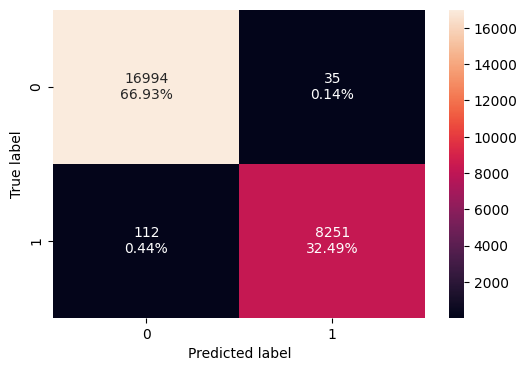

In [27]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

Accuracy  Recall  Precision      F1
0   0.99429 0.98587    0.99658 0.99119

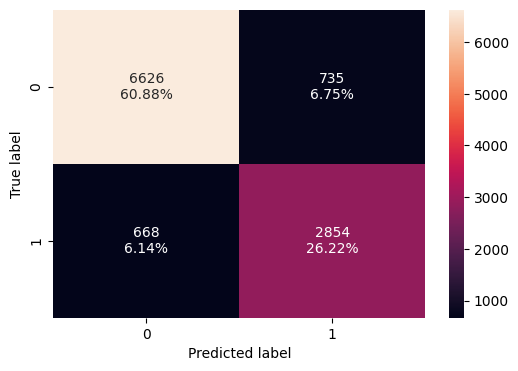

In [ ]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [ ]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

Accuracy  Recall  Precision      F1
0   0.87108 0.81034    0.79521 0.80270

### Decision Tree (with class_weights)

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [ ]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

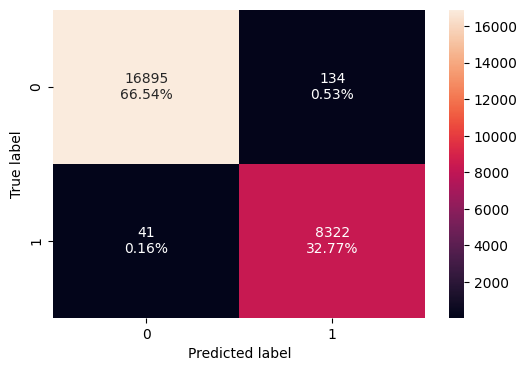

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99311 0.99510    0.98415 0.98960

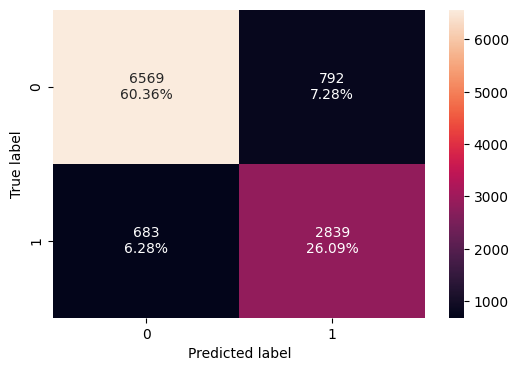

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.86447 0.80608    0.78188 0.79379

**Let's use pruning techniques to try and reduce overfitting.**

### Decision Tree (Pre-pruning)

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10, random_state=1)

Test Accuracy: 0.84


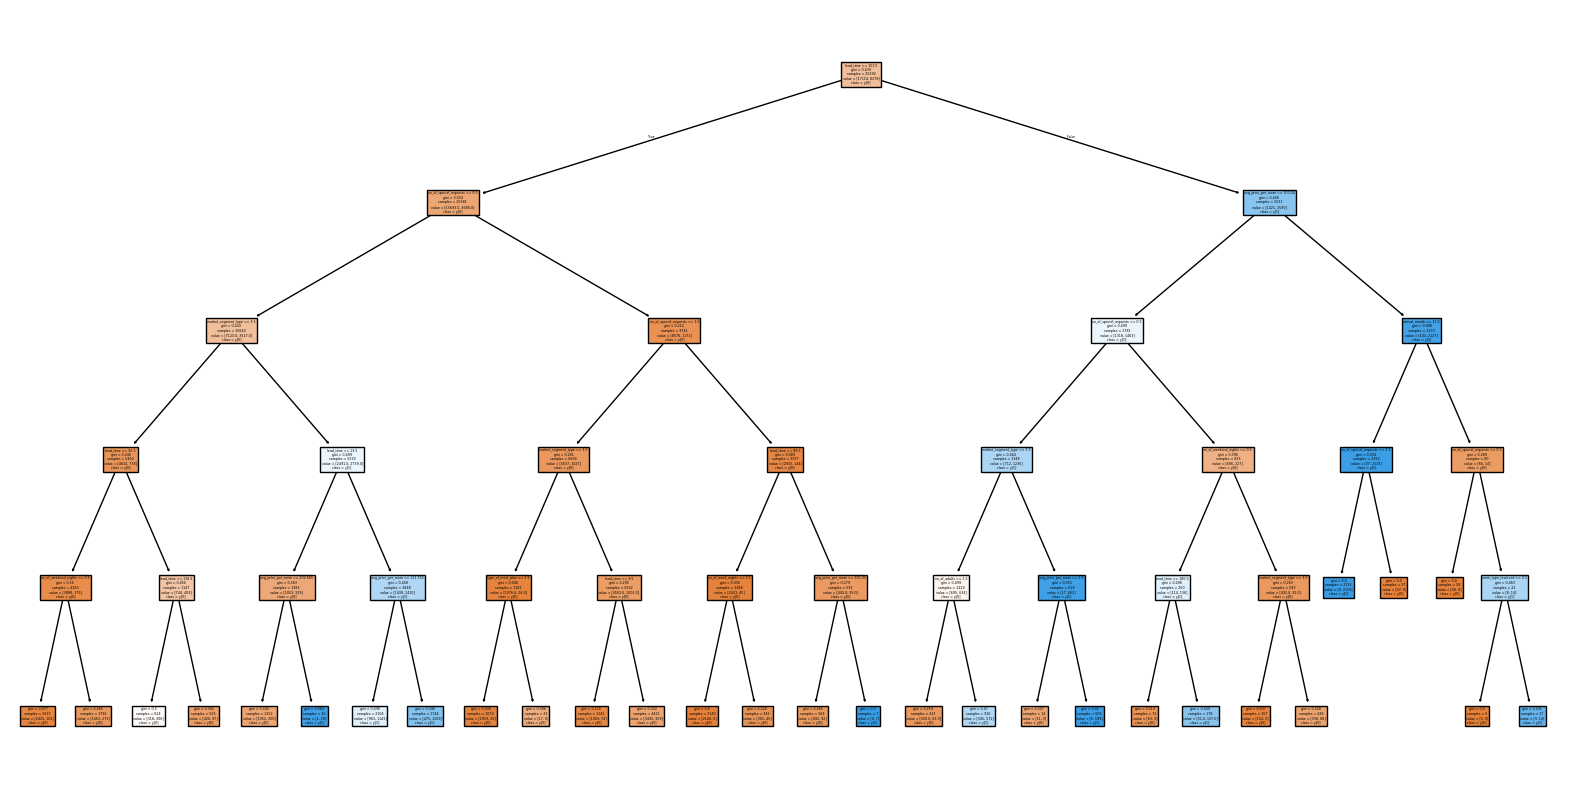

In [ ]:
#addition
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Preprocessing (encoding categorical variables if needed)
label_encoders = {}
for column in inn.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    inn[column] = le.fit_transform(inn[column].astype(str))
    label_encoders[column] = le

# Define features and target
X = inn.drop('booking_status', axis=1)  # Replace 'TargetColumn' with your actual target column name
y = inn['booking_status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a pre-pruned decision tree
clf = DecisionTreeClassifier(
    max_depth=5,           # Limit the maximum depth of the tree
    min_samples_split=10,  # Minimum number of samples required to split an internal node
    min_samples_leaf=5,    # Minimum number of samples required to be at a leaf node
    random_state=42
)
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=True, filled=True)
plt.show()


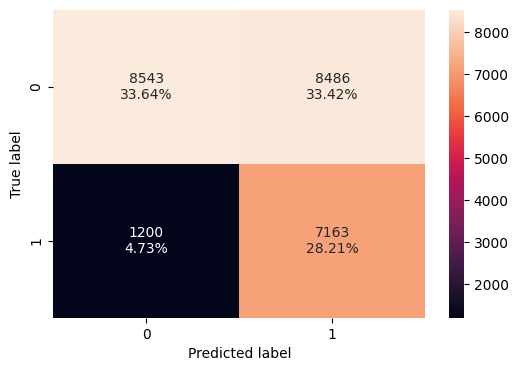

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.61854 0.85651    0.45773 0.59662

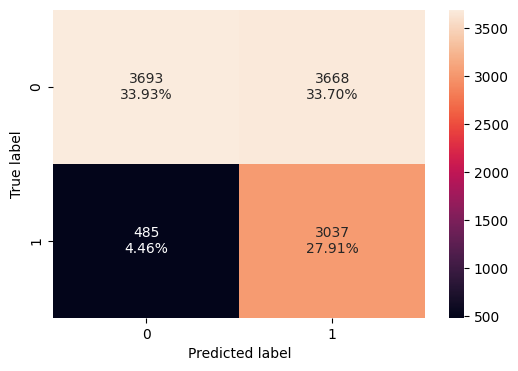

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.61840 0.86229    0.45295 0.59392

* The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.86 which shows that the model is able to generalize well on unseen data.

In [ ]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

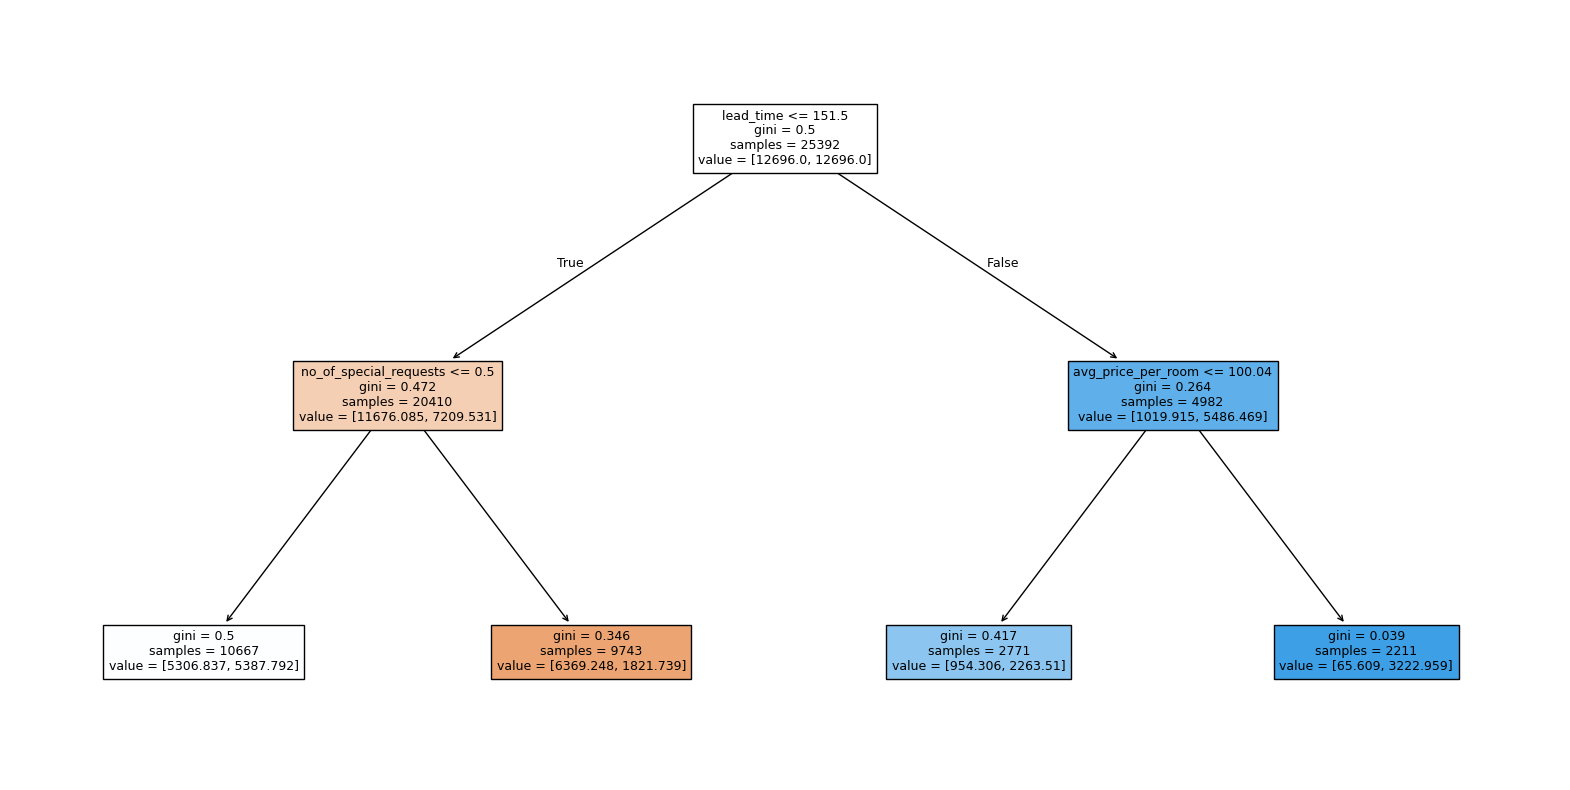

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [5306.84, 5387.79] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6369.25, 1821.74] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [954.31, 2263.51] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [65.61, 3222.96] class: 1



**Observations from the pre-pruned tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If the lead time is less than or equal to 151.50, no of special requests is less than or equal to 0.50, the avg_price_per_room  is less than or equal to 100.04 and the avg price per room is lesser than 100.04.

`Interpretations from other decision rules can be made similarly`

In [ ]:
importances = estimator.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.67701797, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.08174876, 0.24123327, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

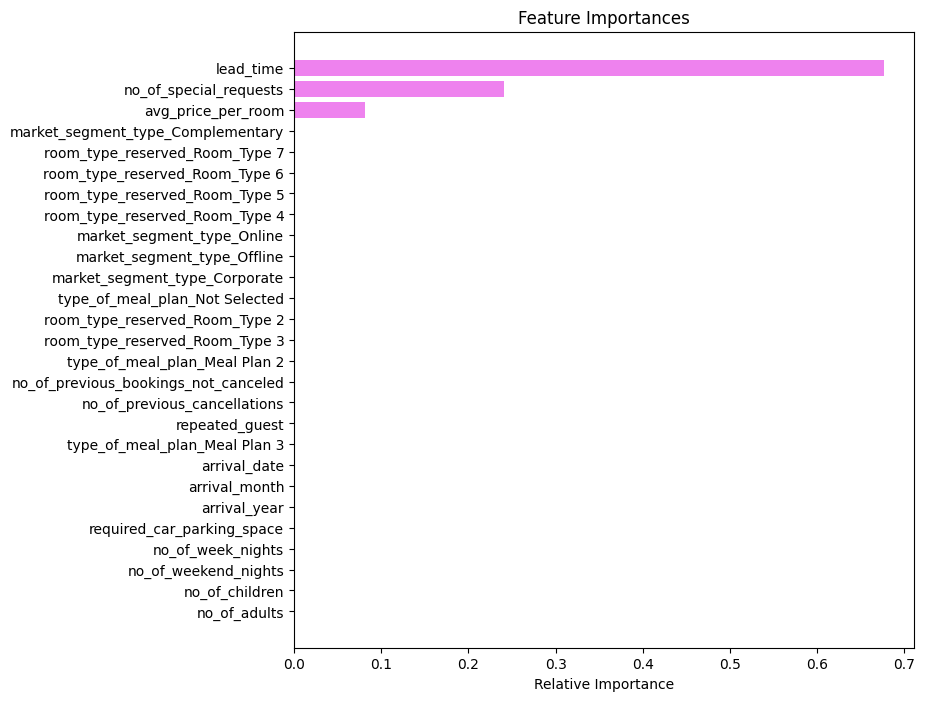

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre tuned decision tree also, lead_time, no_of_special_requests and avg_price_per_room are the most important features.

### Decision Tree (Post pruning)

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

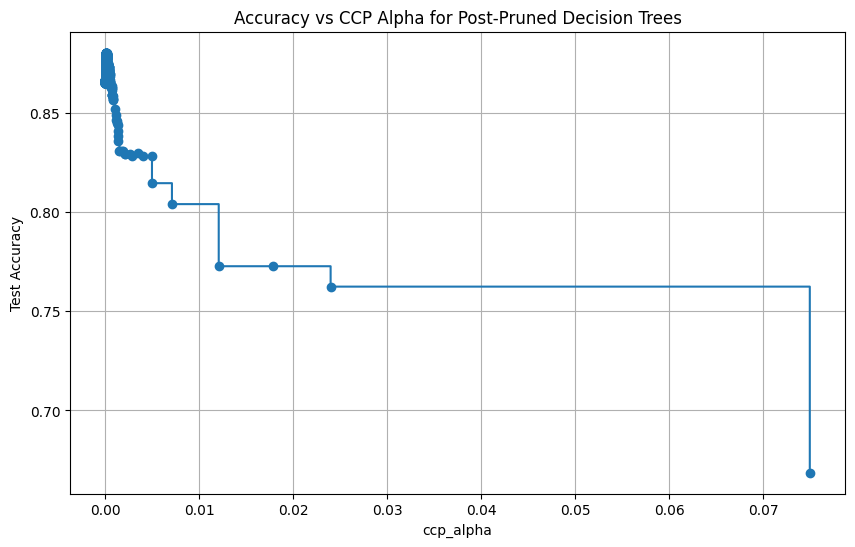

Best ccp_alpha: 0.00012, Test Accuracy: 0.8805


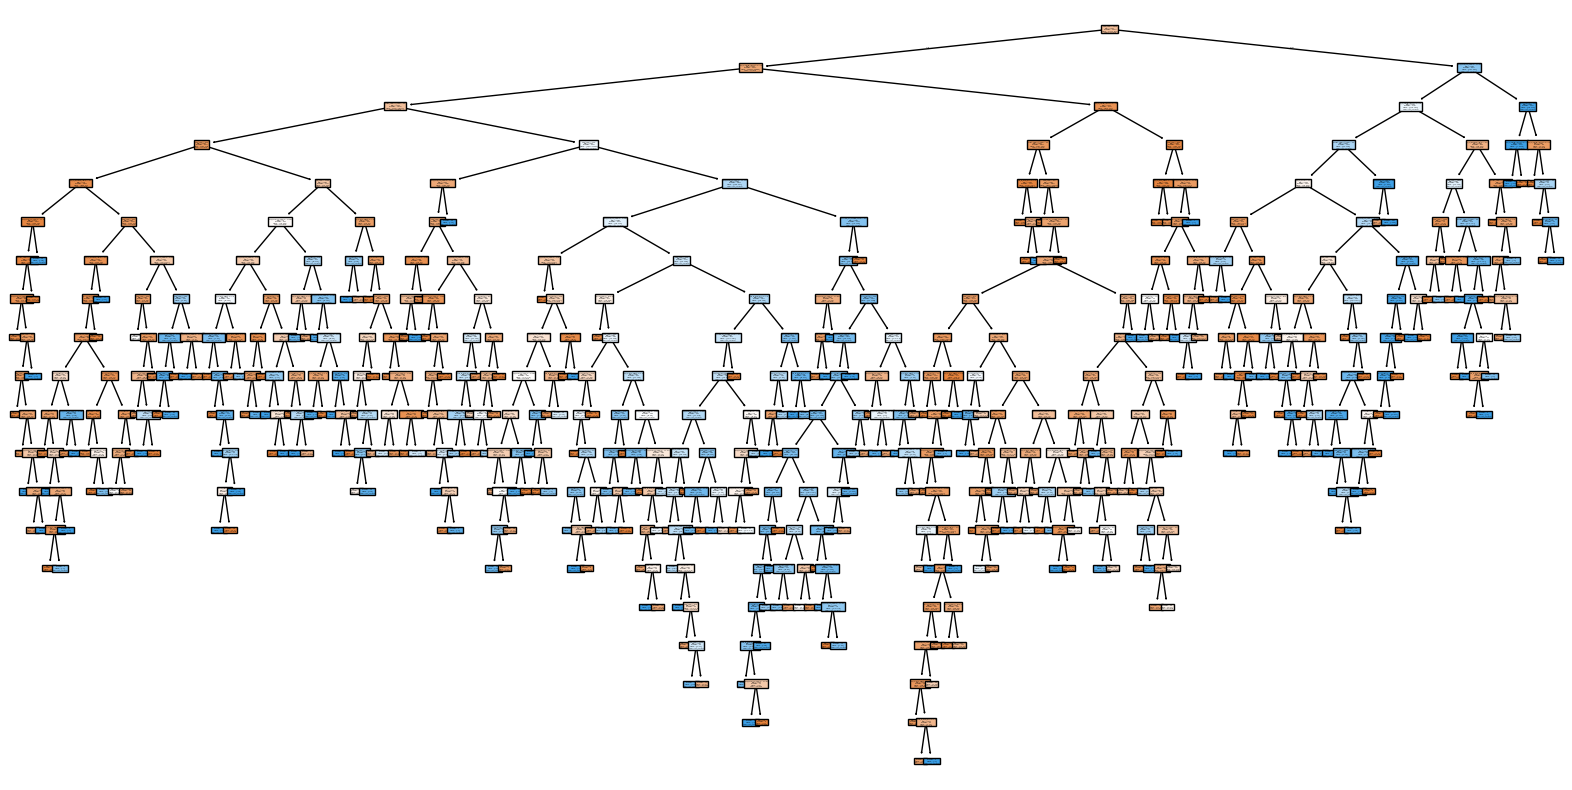

In [ ]:
#addition
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Encode categorical variables
label_encoders = {}
for column in inn.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    inn[column] = le.fit_transform(inn[column].astype(str))
    label_encoders[column] = le

# Features and target
columns_to_drop = ['booking_status', 'Booking_ID']
X = inn.drop(columns=[col for col in columns_to_drop if col in inn.columns], axis=1)
y = inn['booking_status']
y = inn['booking_status']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an initial tree to get ccp_alpha values
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Remove negative alpha values (due to floating point precision issues)
ccp_alphas = [alpha for alpha in path.ccp_alphas if alpha >= 0]

# Train trees with different alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)


# Evaluate accuracy on the test set for each tree
test_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

# Plot accuracy vs alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, test_scores, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Test Accuracy")
plt.title("Accuracy vs CCP Alpha for Post-Pruned Decision Trees")
plt.grid()
plt.show()

# Select the best tree based on highest test accuracy
best_index = test_scores.index(max(test_scores))
best_clf = clfs[best_index]
print(f"Best ccp_alpha: {ccp_alphas[best_index]:.5f}, Test Accuracy: {test_scores[best_index]:.4f}")

# Plot the best pruned tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, feature_names=X.columns, class_names=['Canceled', 'Not_Canceled'], filled=True)
plt.show()


In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1       -0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1837     0.00890     0.32806
1838     0.00980     0.33786
1839     0.01272     0.35058
1840     0.03412     0.41882
1841     0.08118     0.50000

[1842 rows x 2 columns]

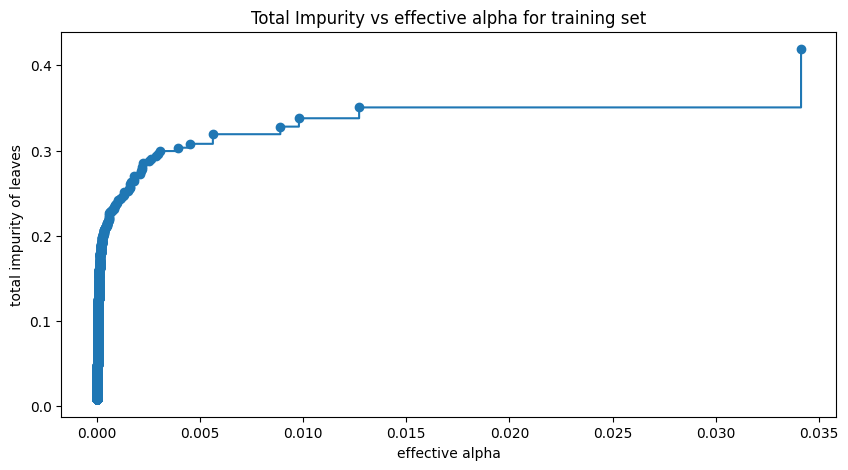

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136943


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

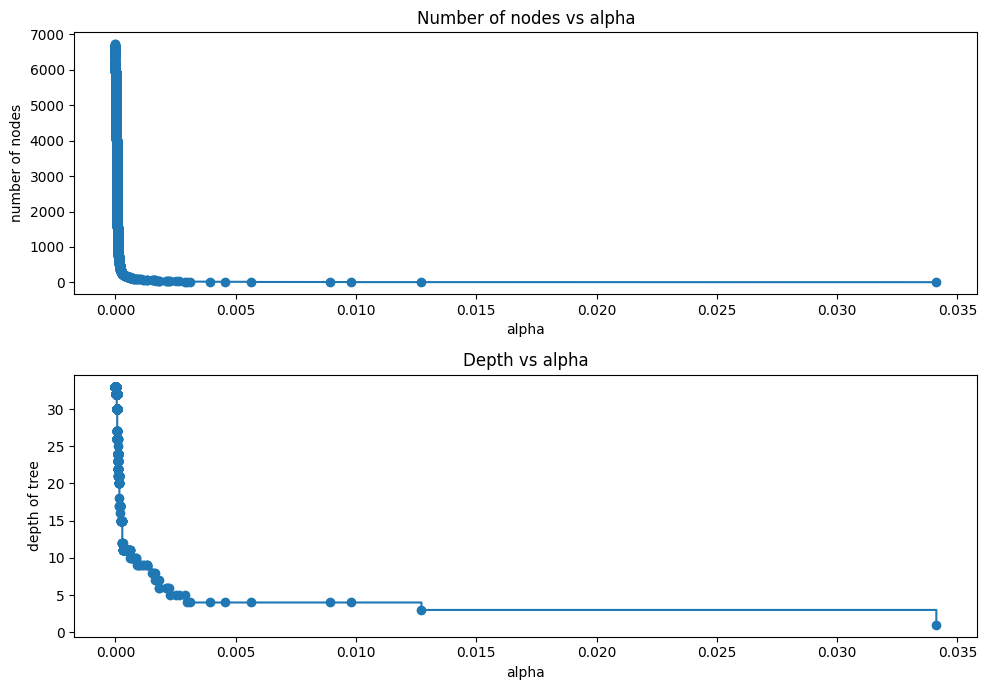

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

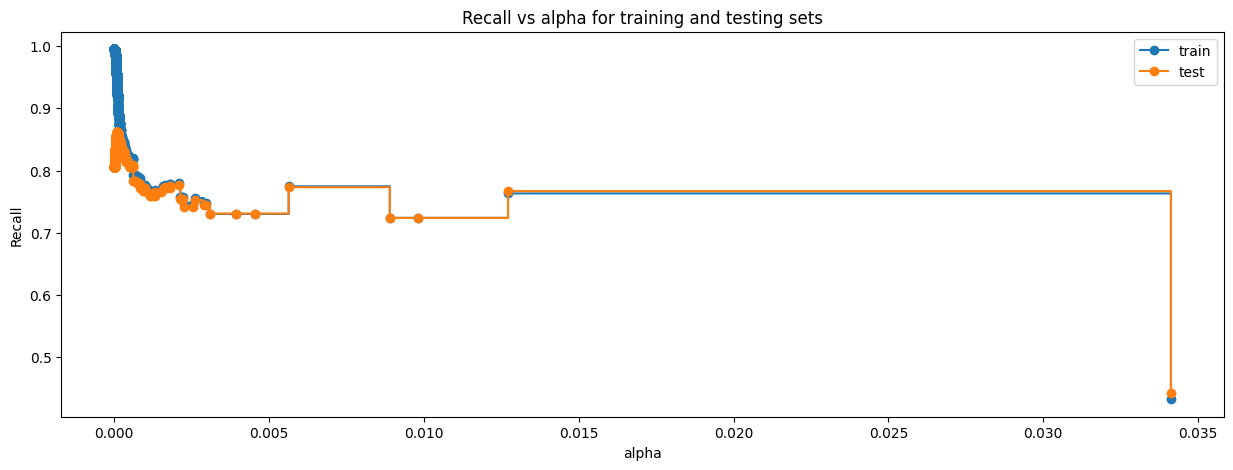

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(8.046650001478856e-05),
                       class_weight='balanced', random_state=1)


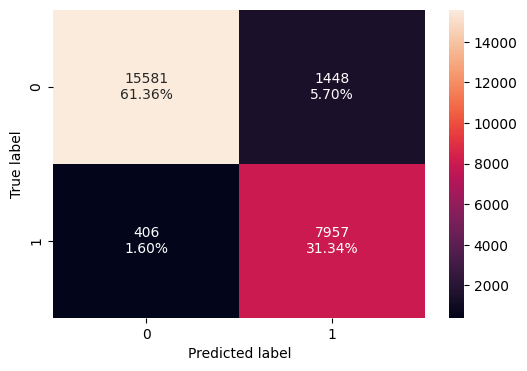

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.92698 0.95145    0.84604 0.89566

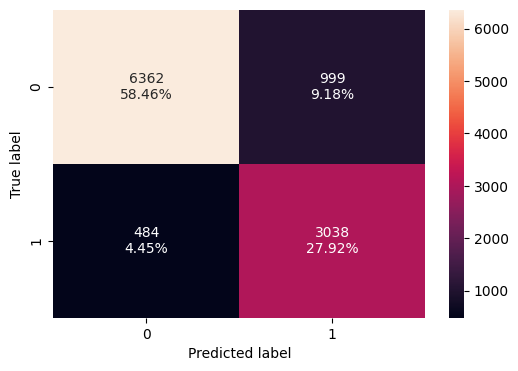

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

Accuracy  Recall  Precision      F1
0   0.86373 0.86258    0.75254 0.80381

* In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming to be around 0.86 which shows that the model is able to generalize well on unseen data.

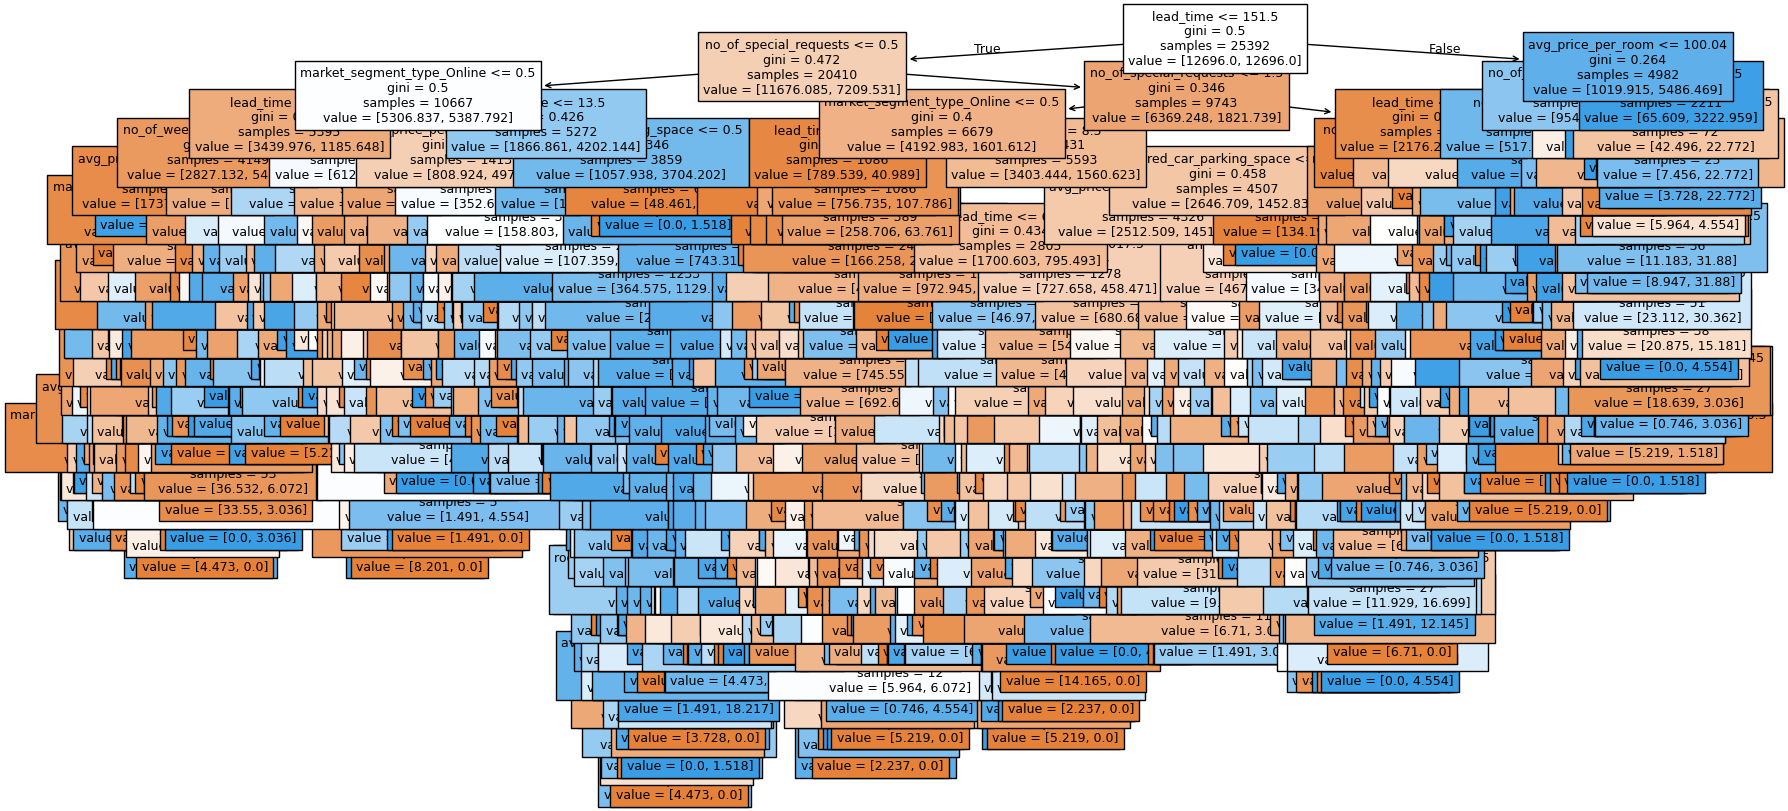

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))


|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

- We can see that the observation we got from the pre-pruned tree is also matching with the decision tree rules of the post pruned tree.

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

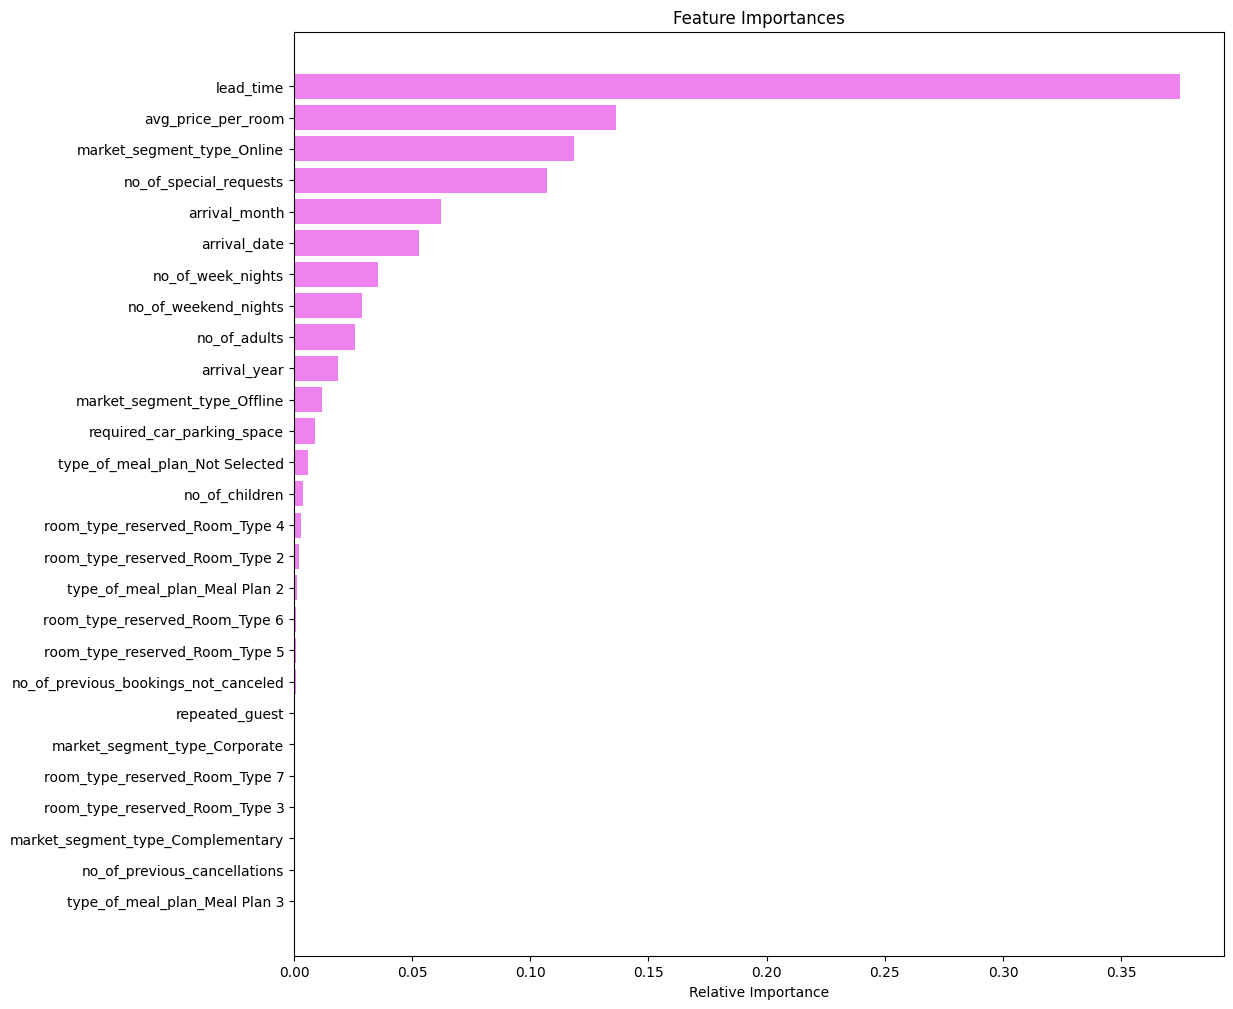

In [ ]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- lead_time  and avg_price_per_room are the most important features for the post pruned tree

## Comparison of Models and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree without class_weight  \
Accuracy                              0.99421   
Recall                                0.98661   
Precision                             0.99578   
F1                                    0.99117   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.99311                      0.61854   
Recall                             0.99510                      0.85651   
Precision                          0.98415                      0.45773   
F1                                 0.98960                      0.59662   

           Decision Tree (Post-Pruning)  
Accuracy                        0.92698  
Recall                          0.95145  
Precision                       0.84604  
F1                              0.89566

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree without class_weight  \
Accuracy                              0.87108   
Recall                                0.81034   
Precision                             0.79521   
F1                                    0.80270   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.86447                      0.61840   
Recall                             0.80608                      0.86229   
Precision                          0.78188                      0.45295   
F1                                 0.79379                      0.59392   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86373  
Recall                          0.86258  
Precision                       0.75254  
F1                              0.80381

* Decision tree models with pre-pruning and post-pruning both are giving equally high recall scores on both training and test sets.
* However, we will choose the post pruned tree as the best model since it is giving a slightly high precision score on the train and test sets than the pre-pruned tree.

## Conclusions and Recommendations



*   Deploy the Post-Pruned Decision Tree Model
This model demonstrates high recall (≈ 86%), making it suitable for early identification of likely cancellations.
High recall ensures fewer false negatives, i.e., fewer actual cancellations are missed.
*   Target Bookings with Long Lead Time
Lead time has a strong positive correlation with cancellations.
Recommendation: Introduce policies such as non-refundable bookings or deposit requirements for reservations made far in advance to reduce risk.


*   Monitor and Incentivize Based on Average Room Price
Higher average prices are linked to increased cancellations, possibly due to price sensitivity.
Recommendation: Implement flexible pricing strategies or tiered refund policies based on room price to encourage commitment.
*   Prioritize Guests with Special Requests
Guests who make special requests are significantly less likely to cancel.
Recommendation: Encourage personalization by highlighting options to make special requests during booking, indicating guest engagement and intent to stay.


*   Modify Policies Based on Meal Plan Preferences
Bookings with Meal Plan 1 have a lower likelihood of cancellation.
Recommendation: Promote Meal Plan 1 in non-refundable or partially refundable deals, reinforcing commitment.
*   Flag High-Risk Segments Using Model Predictions
Use the model to flag high-risk bookings at the time of confirmation (e.g., long lead time + no special requests + high room price).
Recommendation: Send automated follow-ups, require partial prepayment, or apply stricter cancellation terms for these.





